## Setup: Imports and Installations

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

## Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno # missing values visualization

## Stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import zscore

## Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

## Classes Imbalance
from imblearn.over_sampling import SMOTE

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Time
import time

## Warnings
import warnings
warnings.filterwarnings('ignore')

# some more imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/internwork'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Data Preprocessing:
 Load the provided dataset and perform initial data exploration.
 Handle missing data and outliers.
 Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/internwork/customer_churn_large_dataset.xlsx')
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [ ]:
df.shape

(100000, 9)

In [ ]:
# df.drop('CustomerID',axis=1,inplace=True)
# df.drop('Name',axis=1,inplace=True)

In [ ]:
df.tail(2)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


Details of the dataset:

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID               

Violin Plots to detect any possible outliers, but on plotting them we are able to see that there are negligible outliers

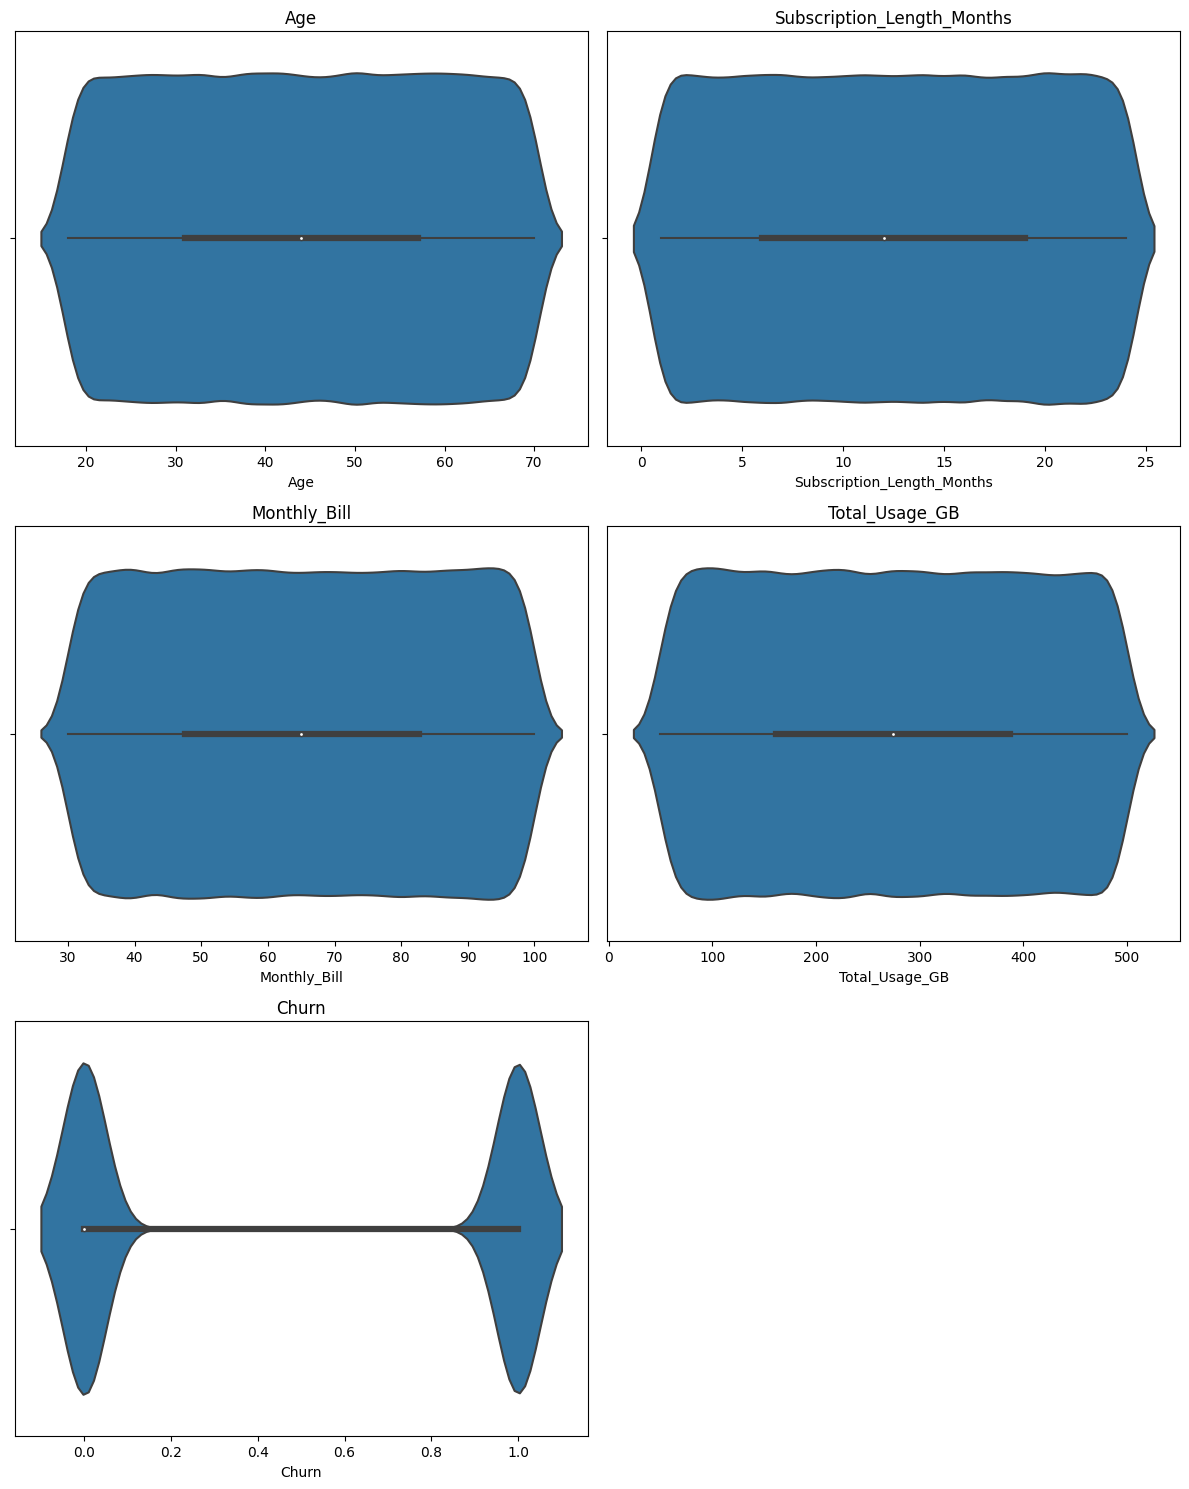

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of columns per row in the subplot grid
num_plots_per_row = 2

# Calculate the number of rows needed based on the number of numerical columns
num_rows = len(numerical_columns) // num_plots_per_row
if len(numerical_columns) % num_plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(12, 5 * num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot barplots for each numerical column
for i, column in enumerate(numerical_columns):
    row_idx = i // num_plots_per_row
    col_idx = i % num_plots_per_row

    ax = axes[row_idx, col_idx]

    sns.violinplot(data=df, x=column, ax=ax)
    ax.set_title(column)

# Remove empty subplots
for i in range(len(numerical_columns), num_rows * num_plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


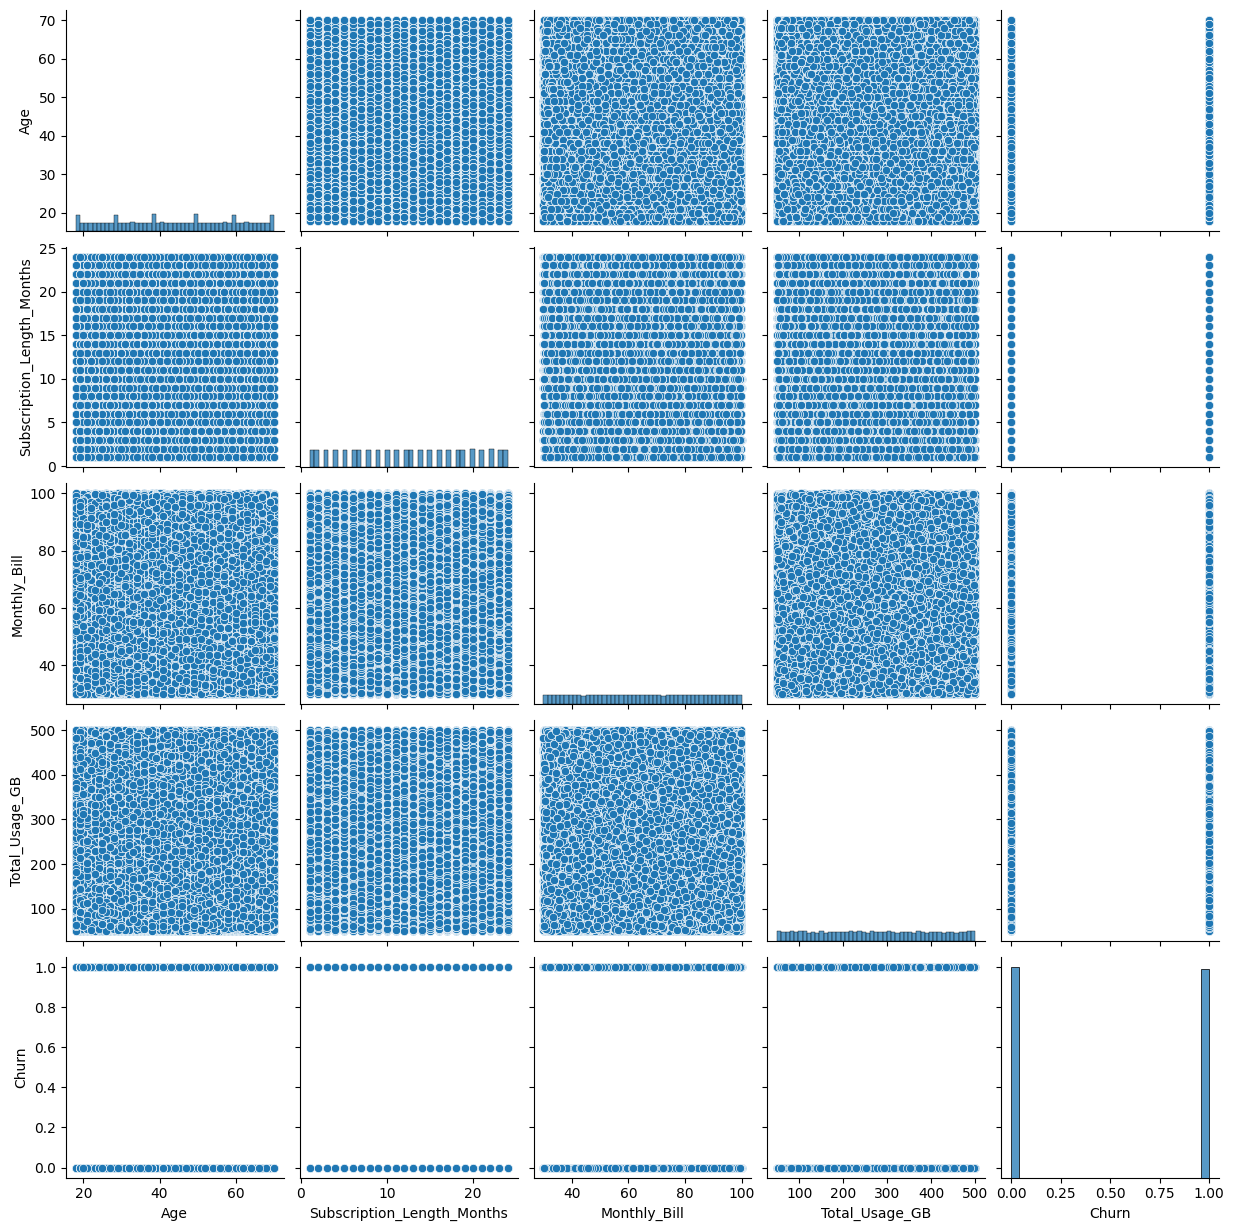

In [ ]:
# Data visualization (e.g., histograms, scatter plots)
sns.pairplot(df)
plt.show()

No missing values found

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
Senior Citizen                0
Junior Citizen                0
Median Citizen                0
dtype: int64

In [ ]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior Citizen,Junior Citizen,Median Citizen,SubscriptionCategory
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1,0,0,Two Years
1,2,Customer_2,62,Female,New York,1,48.76,172,0,1,0,0,One Month
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0,0,1,One Year
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0,0,1,One Year
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0,0,1,Two Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,0,0,1,Two Years
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,1,0,0,Two Years
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,1,0,0,Two Years
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,1,0,0,Two Years


In [ ]:
df_encoded.shape

(100000, 15)

In [ ]:
df_encoded

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior Citizen,Junior Citizen,Median Citizen,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,1,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,0,0,1,0,1,0,1,0,0,0
99996,62,19,61.65,351,0,1,0,0,1,0,0,0,0,0,1
99997,64,17,96.11,251,1,1,0,0,0,1,1,0,0,0,0
99998,51,20,49.25,434,1,1,0,0,1,0,0,0,0,0,1


Outlier Removal is not needed yet but can be donw with z score method by uncommenting this:

In [ ]:
# z_scores.describe()
# # Example: Remove outliers using Z-score
# z_scores = zscore(df_encoded)
# df_no_outliers = df_encoded[(abs(z_scores) < 3).all(axis=1)]
# df_no_outliers

We could say looking at the above result that this doesnt  have outliers

Normalisation did not have a lot of effect her on the dataset

We will now do encoding of categorical variables in our data

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Apply label encoding to the 'Age_Group_Indicator' column
df['Age_Group_Indicator'] = label_encoder.fit_transform(df['Age_Group_Indicator'])
df = pd.get_dummies(df, columns=['Gender','Location'])

In [ ]:
df.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,Age_Group_Indicator,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,13.882353,NaN,112.769247,17,NaN,1,17,NaN,0,1,0,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,172.000000,-24.60,74.954041,1,0.0,1,0,NaN,1,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,92.000000,36.71,131.384781,5,0.0,2,3,NaN,1,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,99.000000,12.47,150.553708,3,0.0,0,0,8.193333,1,0,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,14.000000,-39.80,89.373010,19,1.0,0,15,3.126667,1,0,0,0,0,1,0


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,Age_Group_Indicator,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.000000,99997.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790,43.349682,0.000032,100.000000,12.490100,0.497785,0.866270,-49987.009900,0.000048,0.502160,0.497840,0.199580,0.201570,0.200410,0.200310,0.198130
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998,65.786483,28.588777,31.098696,6.926461,0.499998,0.777375,28867.620918,9.551407,0.499998,0.499998,0.399687,0.401175,0.400309,0.400234,0.398593
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000,2.083333,-69.910000,46.116104,1.000000,0.000000,0.000000,-99986.000000,-23.286667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000,12.687500,-20.680000,73.078653,6.000000,0.000000,0.000000,-74986.250000,-6.856667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000,21.909091,-0.030000,99.933598,12.000000,0.000000,1.000000,-49988.000000,-0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000,42.545455,20.580000,127.034495,19.000000,1.000000,1.000000,-24985.250000,6.876667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000,500.000000,69.460000,153.720347,24.000000,1.000000,2.000000,17.000000,23.166667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Define your target variable and features
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # # Create a MinMaxScaler object
scaler = MinMaxScaler()

# # # Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X)

Various methods with/without normalisation and with/without extra features were tried and tested here

In [ ]:
# Without Normalisation
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
X_train[0]

array([0.69230769, 0.17391304, 0.77857143, 0.34444444, 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        ])

# 2 Feature Engineering:
- Generate relevant features from the dataset that can help improve the model's prediction
accuracy.
- Apply feature scaling or normalization if necessary.


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with the original features: Age, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB
# Replace 'your_dataset.csv' with the path to your dataset
# df = pd.read_csv('your_dataset.csv')

# Feature Engineering

# 1. Average Monthly Data Usage
df['Average_Monthly_Data_Usage'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# 2. Billing Change Rate
df['Billing_Change_Rate'] = df['Monthly_Bill'].diff()

# 3. Billing Amount as a Percentage
df['Billing_As_Percentage'] = (df['Monthly_Bill'] / df['Monthly_Bill'].mean()) * 100

# 4. Customer Tenure in Months
df['Customer_Tenure_Months'] = df['Subscription_Length_Months']

# 5. Churn History (Assuming 'Churn' is a binary column indicating churn history)
df['Churn_History'] = df['Churn'].shift(1)  # Lagged version of the churn column

# 6. Age Group Indicator (Assuming age groups are defined)
age_bins = [0, 30, 50, 100]  # Define your age groups as needed
age_labels = ['Young', 'Middle-Aged', 'Senior']
df['Age_Group_Indicator'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 7. Remaining Subscription Length
df['Remaining_Subscription_Length'] = df['Subscription_Length_Months'] - df.index

# 8. Average Bill Change
df['Average_Bill_Change'] = df['Billing_Change_Rate'].rolling(window=3).mean()

# Display the updated DataFrame with engineered features
print(df.head())


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                          17         73.36             236      0   
1                           1         48.76             172      0   
2                           5         85.47             460      0   
3                           3         97.94             297      1   
4                          19         58.14             266      0   

   Average_Monthly_Data_Usage  Billing_Change_Rate  Billing_As_Percentage  \
0                   13.882353                  NaN             112.769247   
1                  172.000000               -24.60              74.954041   
2                

In [ ]:
df.drop(columns=['Name','CustomerID'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Average_Monthly_Data_Usage',
       'Billing_Change_Rate', 'Billing_As_Percentage',
       'Customer_Tenure_Months', 'Churn_History', 'Age_Group_Indicator',
       'Remaining_Subscription_Length', 'Average_Bill_Change'],
      dtype='object')

### Graphical Analysis

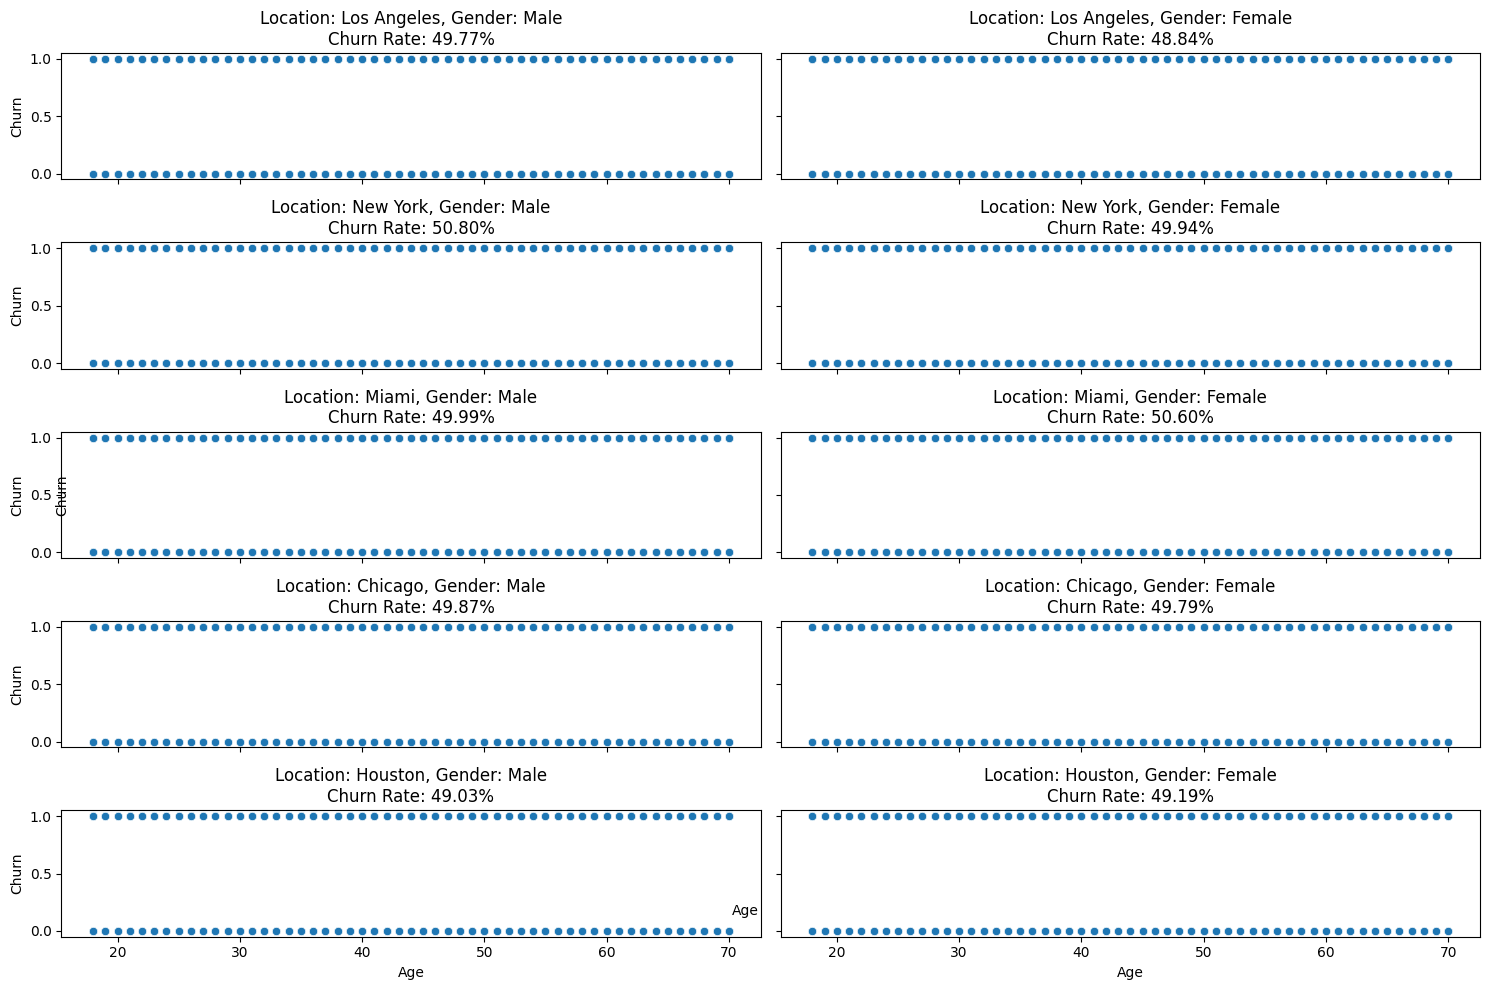

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Filter the data by city and gender
cities = df['Location'].unique()
genders = df['Gender'].unique()

# Create subplots for different cities and genders
fig, axes = plt.subplots(len(cities), len(genders), figsize=(15, 10), sharex=True, sharey=True)

for i, city in enumerate(cities):
    for j, gender in enumerate(genders):
        # Filter data for the current city and gender
        subset = df[(df['Location'] == city) & (df['Gender'] == gender)]

        # Calculate churn rate for the subset
        churn_rate = subset['Churn'].mean()

        # Create a scatter plot
        sns.scatterplot(data=subset, x='Age', y='Churn', ax=axes[i, j])
        axes[i, j].set_title(f'Location: {city}, Gender: {gender}\nChurn Rate: {churn_rate:.2%}')

# Add labels and a common y-axis label
fig.text(0.5, 0.08, 'Age', ha='center')
fig.text(0.04, 0.5, 'Churn', va='center', rotation='vertical')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


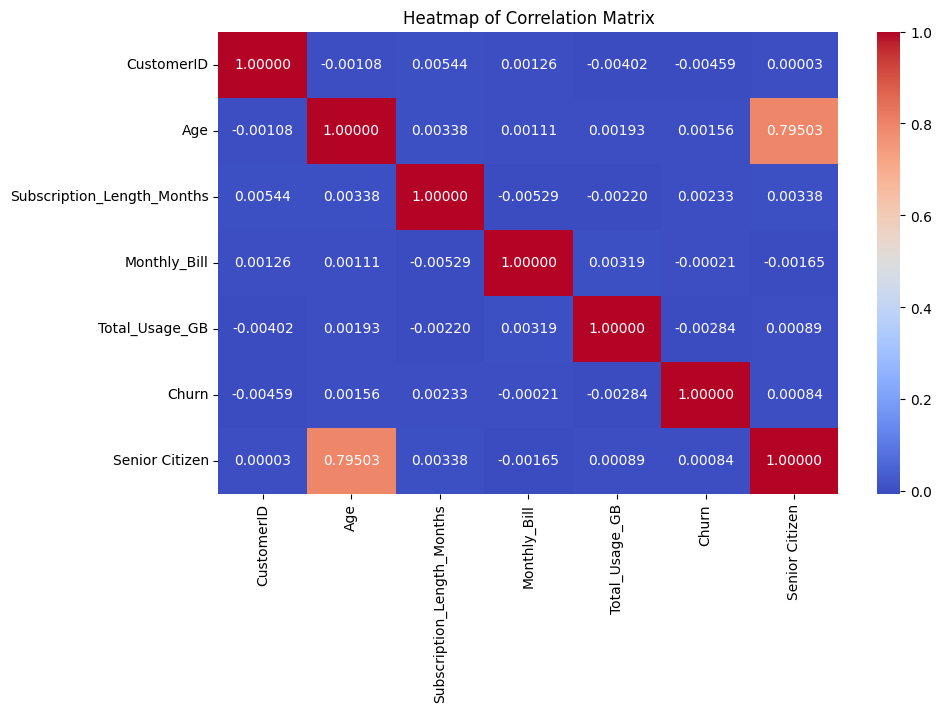

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
senior_age_threshold = 55

# Create a new column 'Senior Citizen' based on age
df['Senior Citizen'] = df['Age'] >= senior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


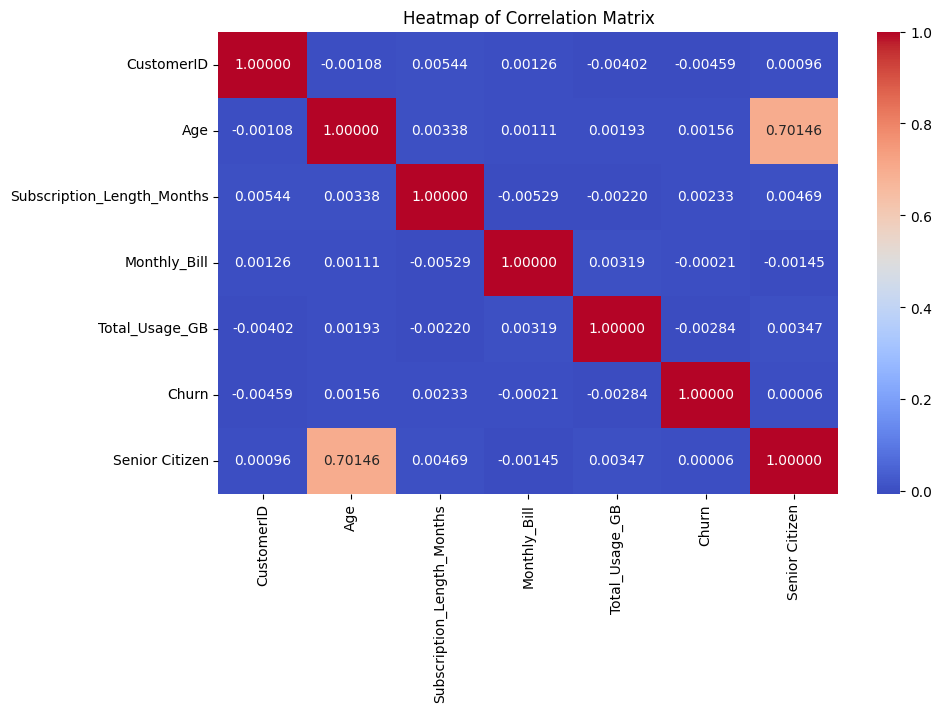

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
senior_age_threshold = 60

# Create a new column 'Senior Citizen' based on age
df['Senior Citizen'] = df['Age'] >= senior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


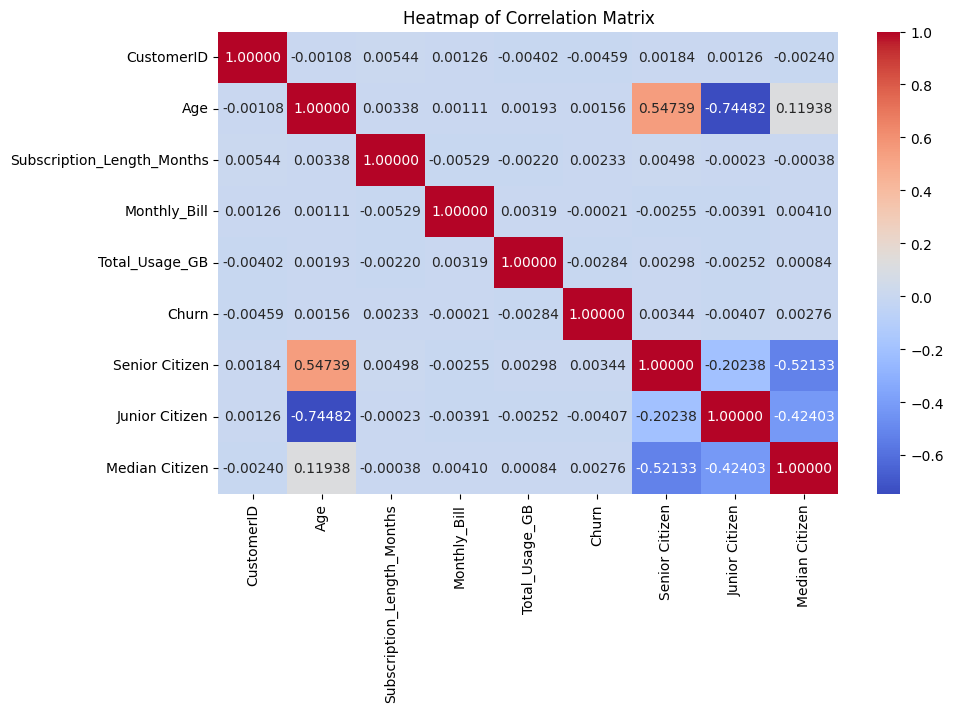

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
senior_age_threshold = 65

# Create a new column 'Senior Citizen' based on age
df['Senior Citizen'] = df['Age'] >= senior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


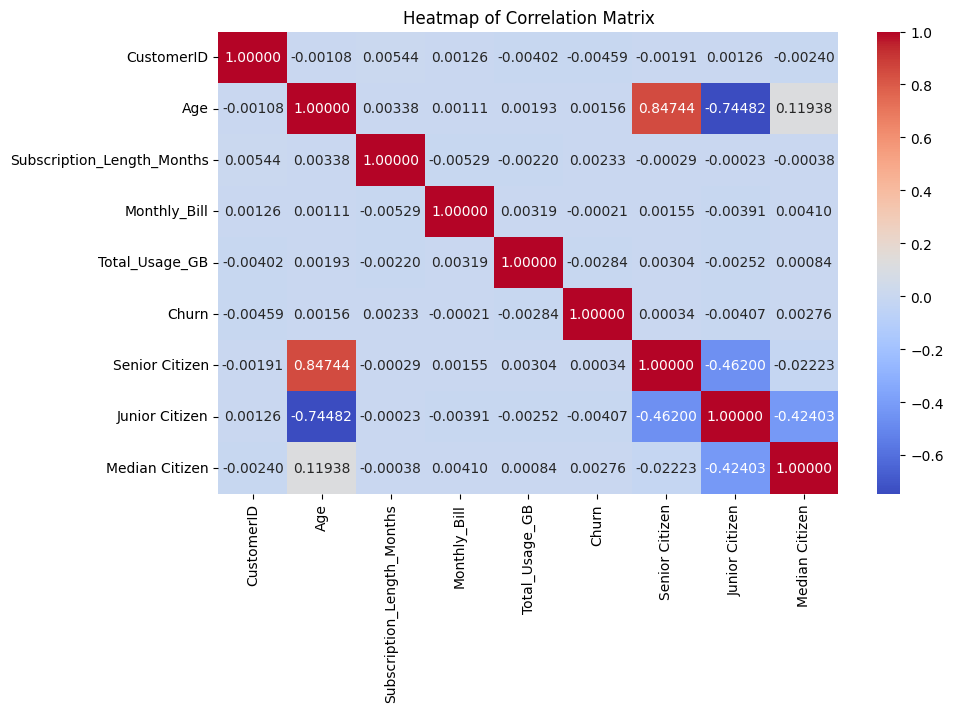

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
senior_age_threshold = 50

# Create a new column 'Senior Citizen' based on age
df['Senior Citizen'] = df['Age'] >= senior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


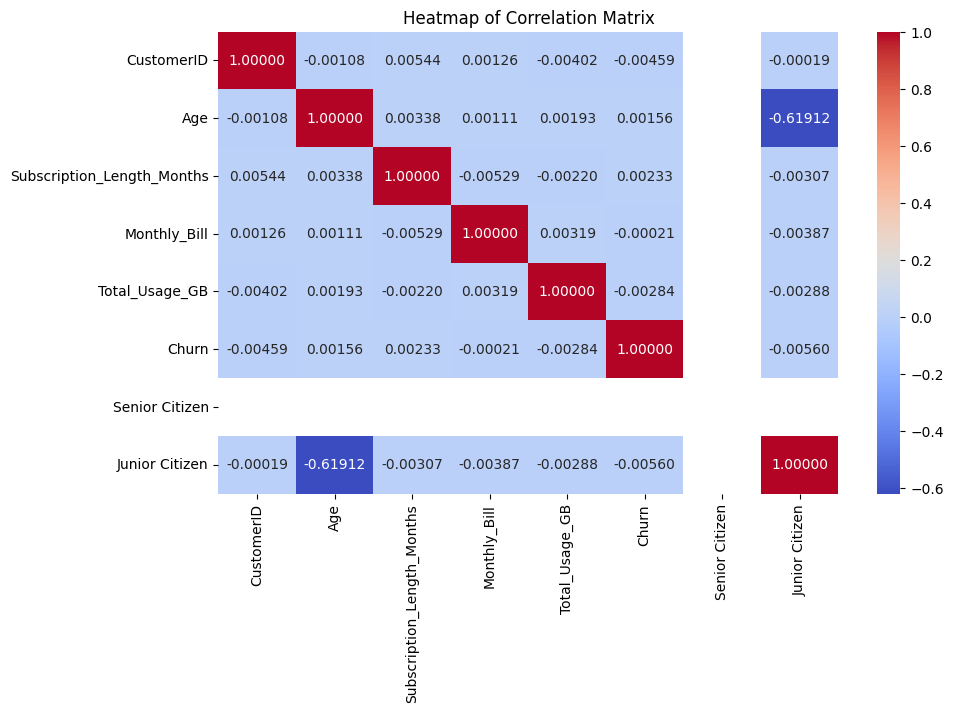

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
junior_age_threshold = 25

# Create a new column 'Senior Citizen' based on age
df['Junior Citizen'] = df['Age'] <= junior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


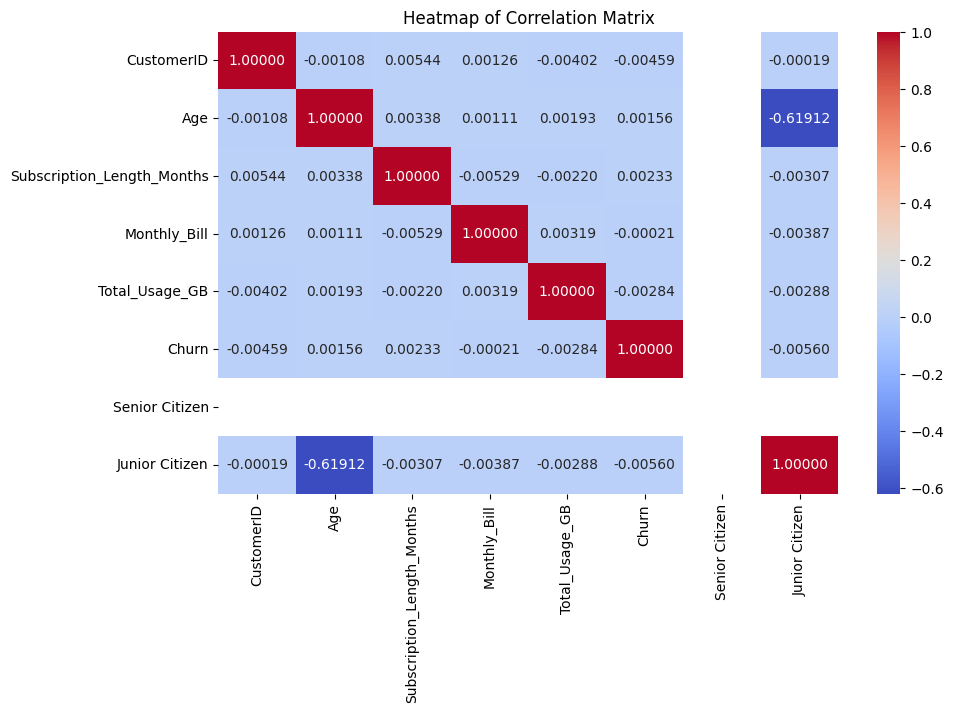

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
junior_age_threshold = 25

# Create a new column 'Senior Citizen' based on age
df['Junior Citizen'] = df['Age'] <= junior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


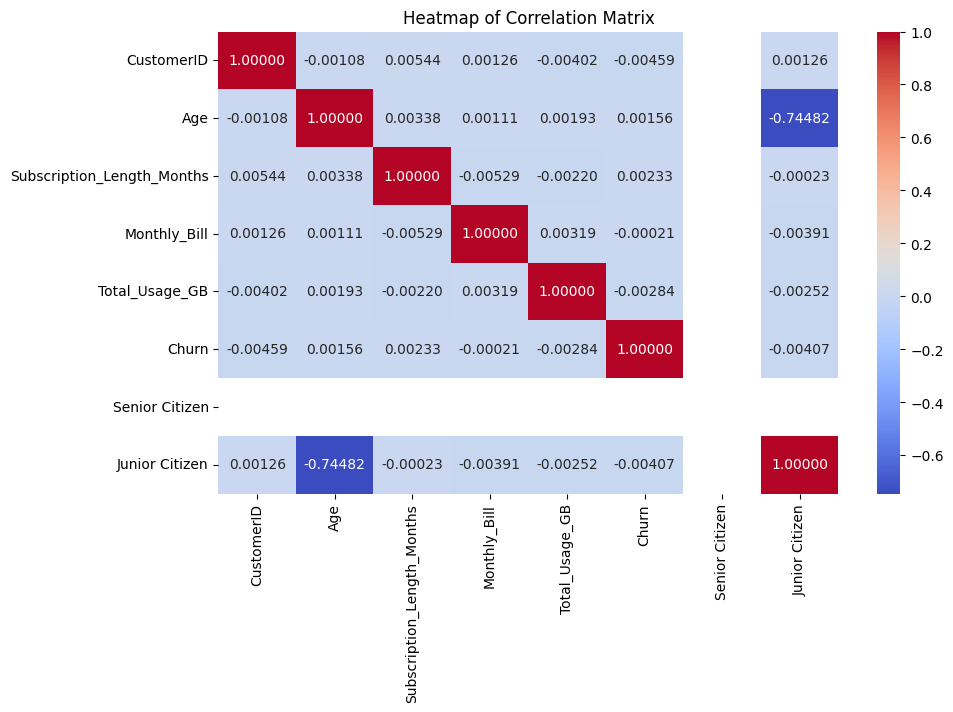

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
junior_age_threshold = 30

# Create a new column 'Senior Citizen' based on age
df['Junior Citizen'] = df['Age'] <= junior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


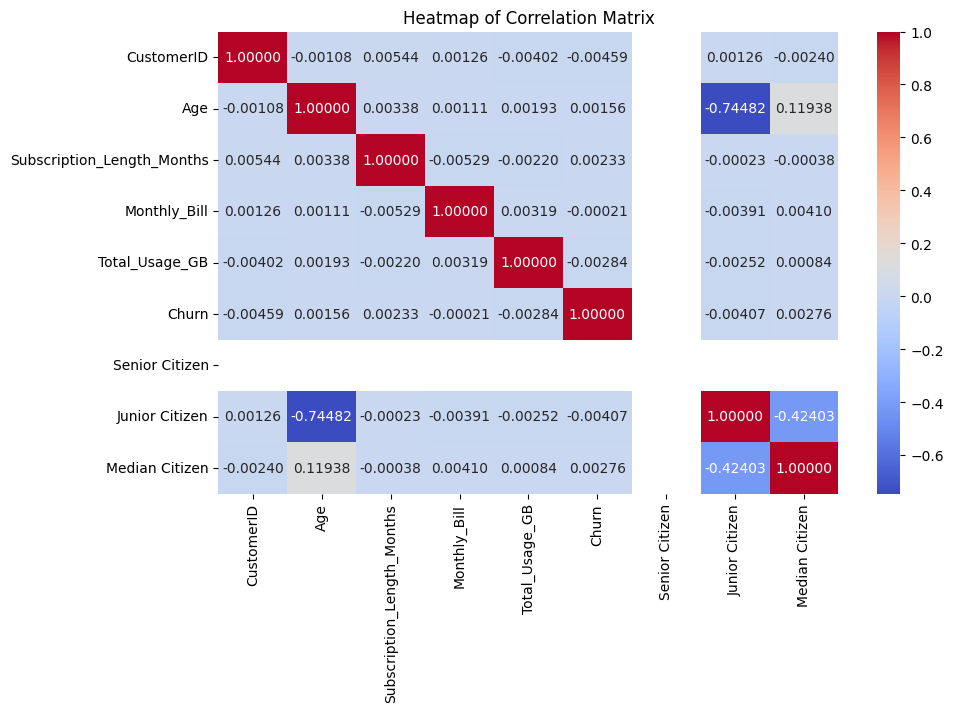

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
high_age_threshold = 65
low_age_threshold = 25

# Create a new column 'Senior Citizen' based on age
# df['Median Citizen'] = df[low_age_threshold <= df['Age'] <= high_age_threshold]

df['Median Citizen'] = df['Age'].apply(lambda age: high_age_threshold >=age >= low_age_threshold)


# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


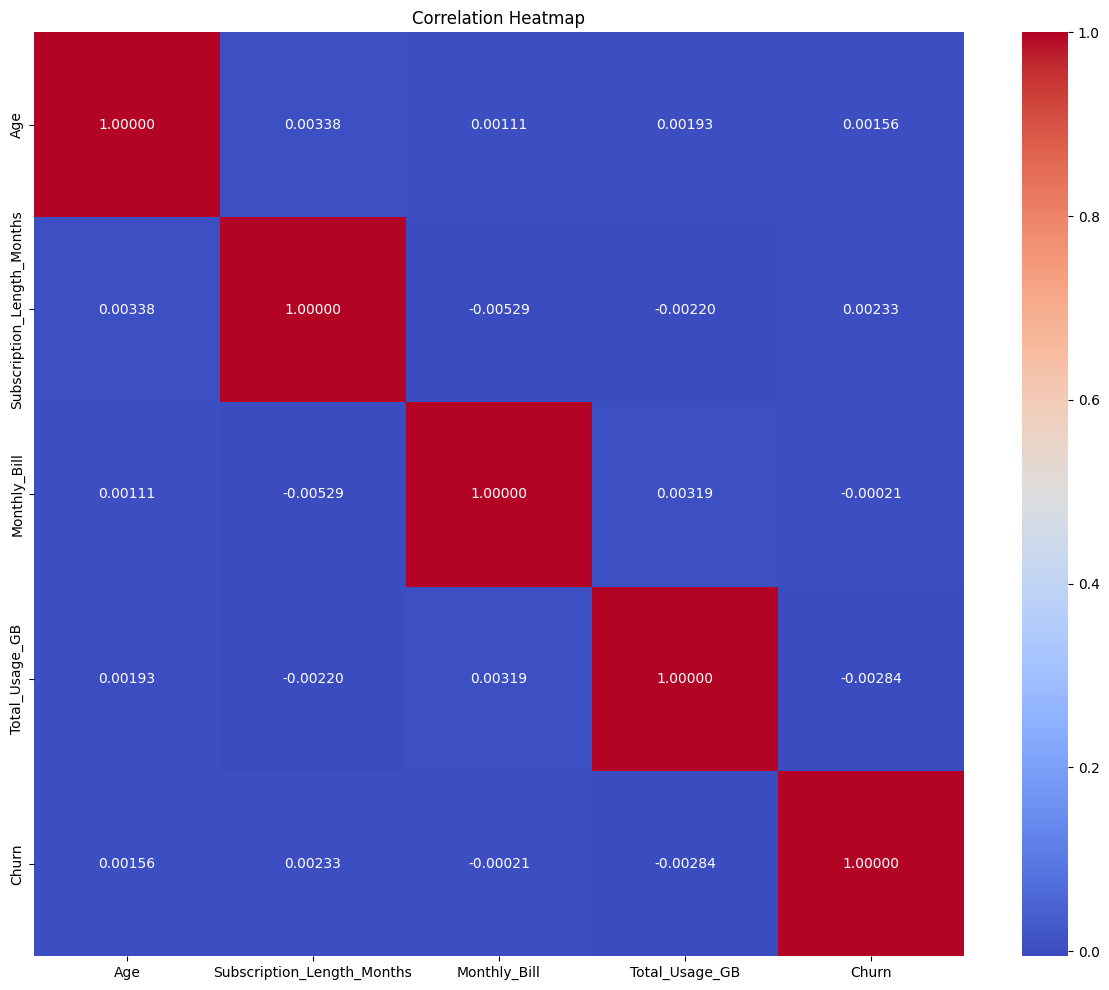

In [ ]:
correlation_matrix = pd.DataFrame(df,columns=df.columns).corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Heatmap')
plt.show()

Surprisingly we see we do not have multicollinearity amongst our features

more usage => more bill

more usage => less churn

more bill => less churn

age => increase in churn

In [ ]:

# df['Senior Citizen'] = df['Age'] >= 50
# df['Junior Citizen'] = df['Age'] <= 20
# df['Median Citizen'] = df['Age'].apply(lambda age: 50 >= age >= 20)

# # Convert boolean columns to integers (0 or 1)
# df['Senior Citizen'] = df['Senior Citizen'].astype(int)
# df['Junior Citizen'] = df['Junior Citizen'].astype(int)
# df['Median Citizen'] = df['Median Citizen'].astype(int)
# df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior Citizen,Junior Citizen,Median Citizen
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1,0,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,1,0,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0,0,1
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0,0,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,0,0,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,1,0,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,1,0,0
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,1,0,0


NameError: ignored

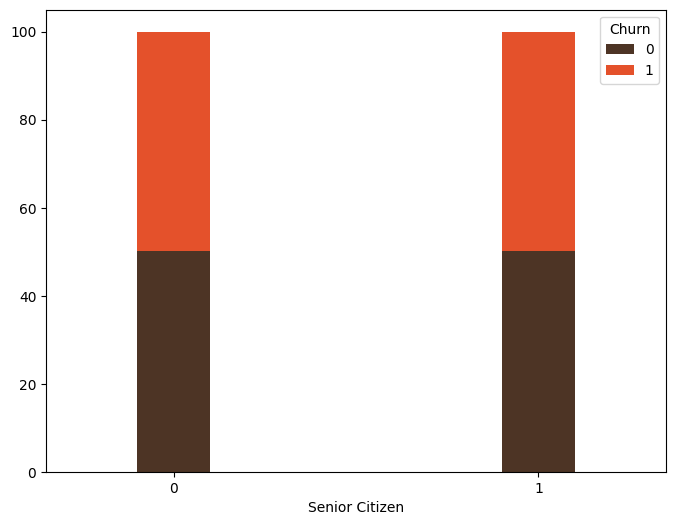

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Senior Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

NameError: ignored

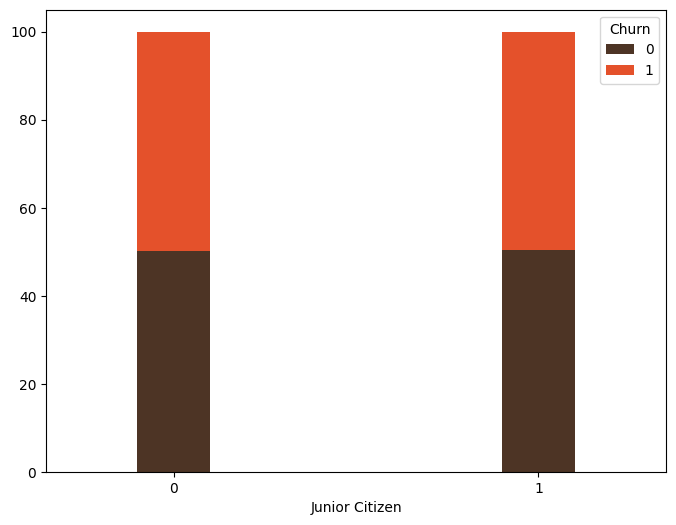

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Junior Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

NameError: ignored

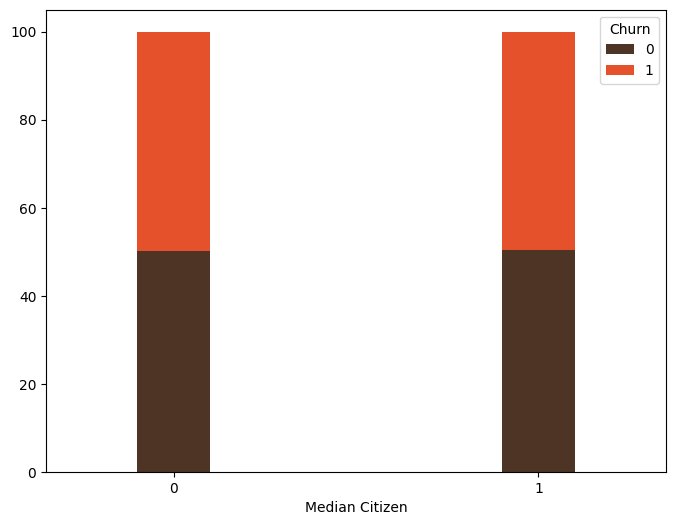

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Median Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
# Create a new column based on the duration
def categorize_subscription(duration):
    if duration <= 1:
        return 'One Month'
    elif duration <= 12:
        return 'One Year'
    elif duration <= 24:
        return 'Two Years'
    else:
        return 'Greater than Two Years'

df['SubscriptionCategory'] = df['Subscription_Length_Months'].apply(categorize_subscription)


NameError: ignored

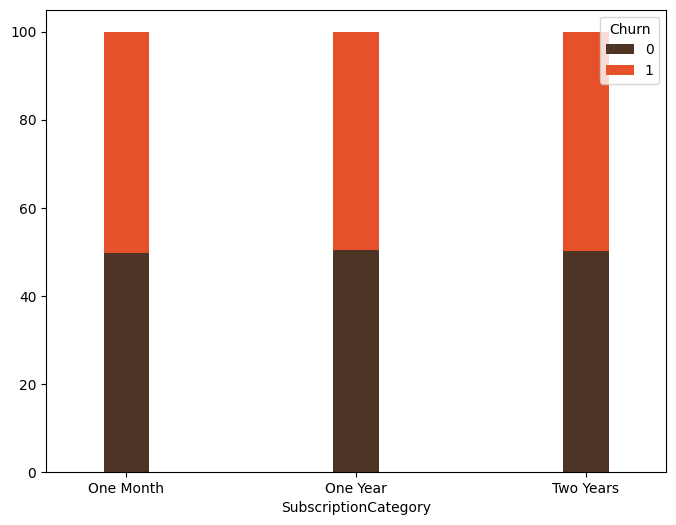

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SubscriptionCategory','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

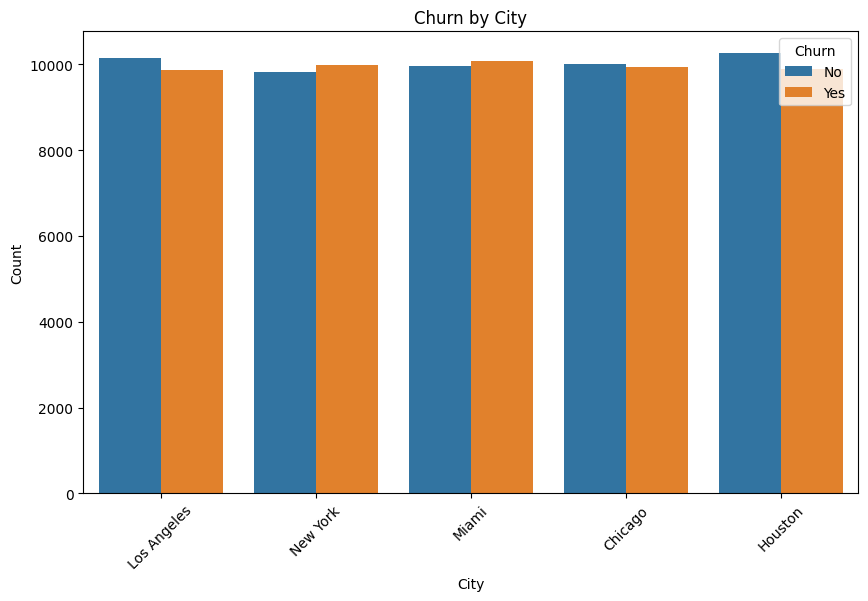

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset includes 'Churn' and 'City' columns

# Create a countplot to visualize the relationship between cities and churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Churn', data=df)
plt.title('Churn by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


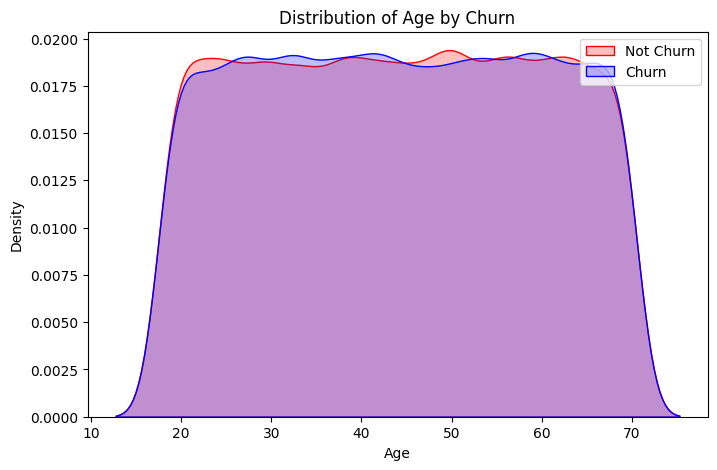

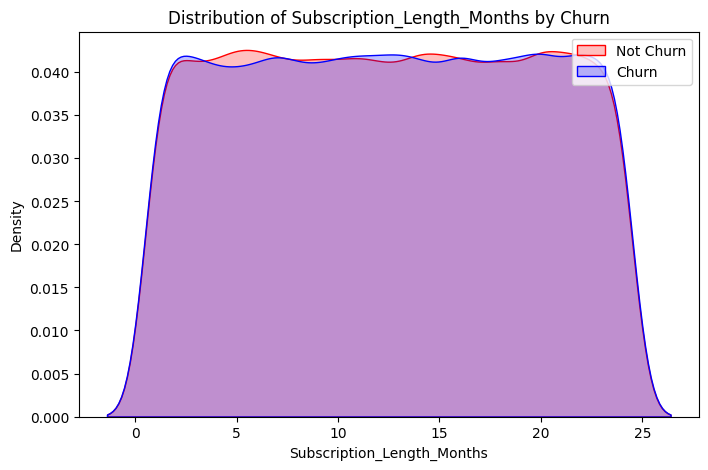

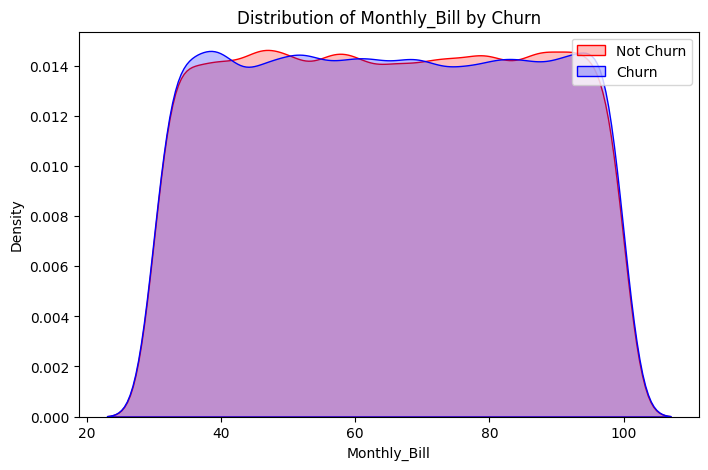

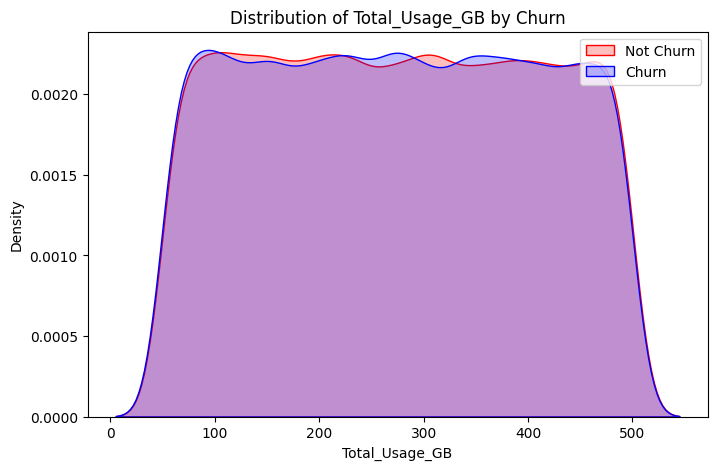

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

continuous=['Age', 'Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB']
categorical=[ 'Gender', 'Location']

for col in continuous:
    plt.figure(figsize=(8, 5))
    ax = sns.kdeplot(df[col][df["Churn"] == 0], color="Red", shade=True)
    ax = sns.kdeplot(df[col][df["Churn"] == 1], ax=ax, color="Blue", shade=True)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col)
    ax.set_title(f'Distribution of {col} by Churn')
    plt.show()


In [ ]:
# todo

In [ ]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Senior Citizen,Junior Citizen,Median Citizen
0,63,Male,Los Angeles,17,73.36,236,0,1,0,0
1,62,Female,New York,1,48.76,172,0,1,0,0
2,24,Female,Los Angeles,5,85.47,460,0,0,0,1
3,36,Female,Miami,3,97.94,297,1,0,0,1
4,46,Female,Miami,19,58.14,266,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1,0,0,1
99996,62,Female,New York,19,61.65,351,0,1,0,0
99997,64,Male,Chicago,17,96.11,251,1,1,0,0
99998,51,Female,New York,20,49.25,434,1,1,0,0


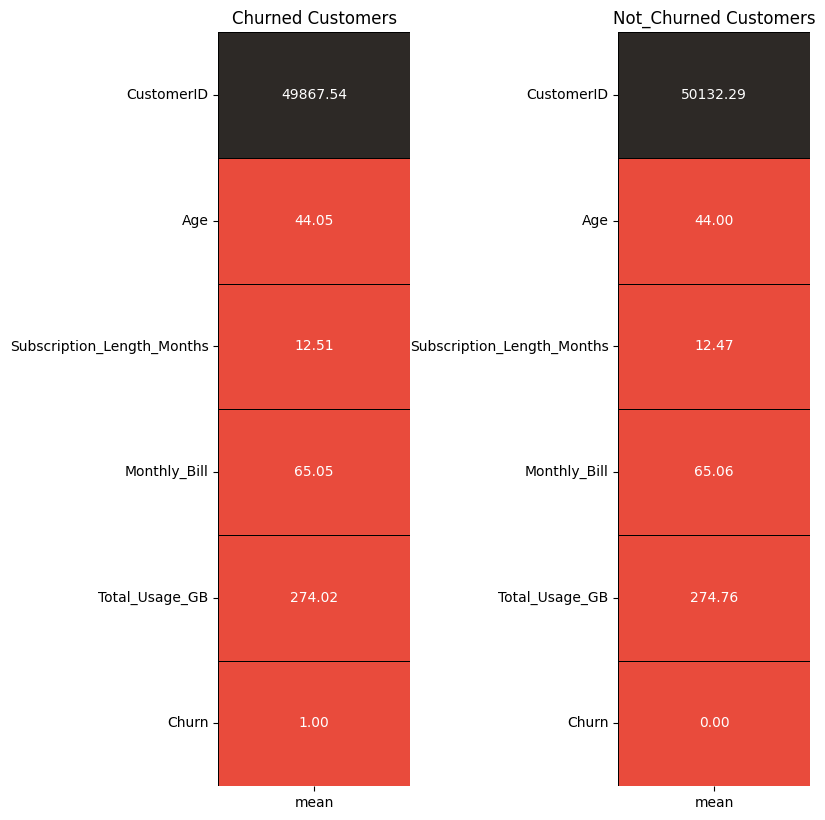

In [ ]:
colors = ['#E94B3C','#2D2926']

churn = df[df['Churn'] == 1].describe().T
not_churn = df[df['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

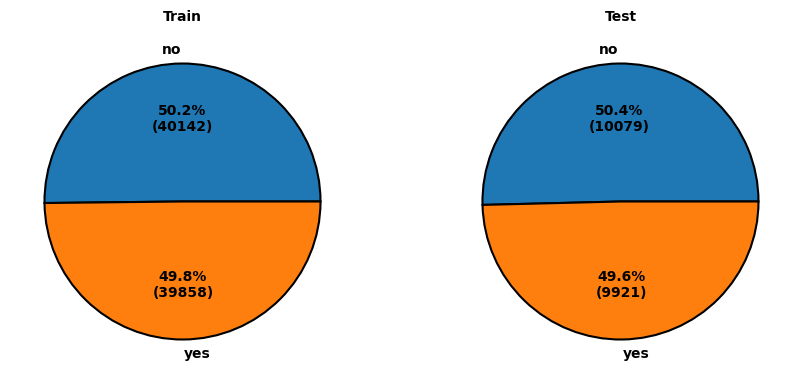

In [ ]:
# Visualization of the objective variable in the training and test set.
df_pct_train = y_train.value_counts().to_frame().rename(index = {0:'no', 1:'yes'})
df_pct_train = df_pct_train.rename(columns = {'y':'count'})

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train.iloc[:,0]

df_pct_test = y_test.value_counts().to_frame().rename(index = {0:'no', 1:'yes'})
df_pct_test = df_pct_test.rename(columns = {'y':'count'})

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('Train', fontsize = 10, fontweight = 'bold', color = 'black')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('Test', fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

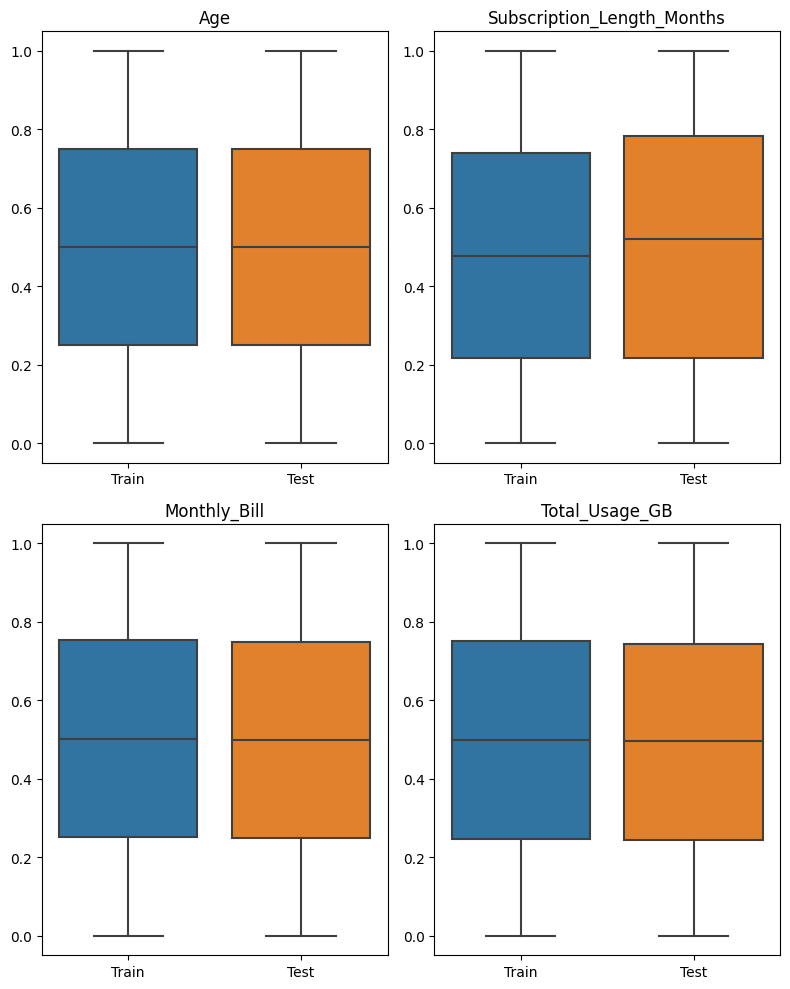

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed based on the number of columns
num_cols = len(continuous)
num_plots_per_row = 2
num_rows = int(np.ceil(num_cols / num_plots_per_row))

# Adjust the figure size based on the number of rows and plots per row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(8, 5 * num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(continuous):
    row_idx = i // num_plots_per_row
    col_idx = i % num_plots_per_row

    # Create a single axis for each variable
    ax = axes[row_idx, col_idx]

    # Create boxplots for train and test data side by side
    sns.boxplot(data=[X_train_cont[column], X_test_cont[column]], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(['Train', 'Test'])

plt.tight_layout()
plt.show()

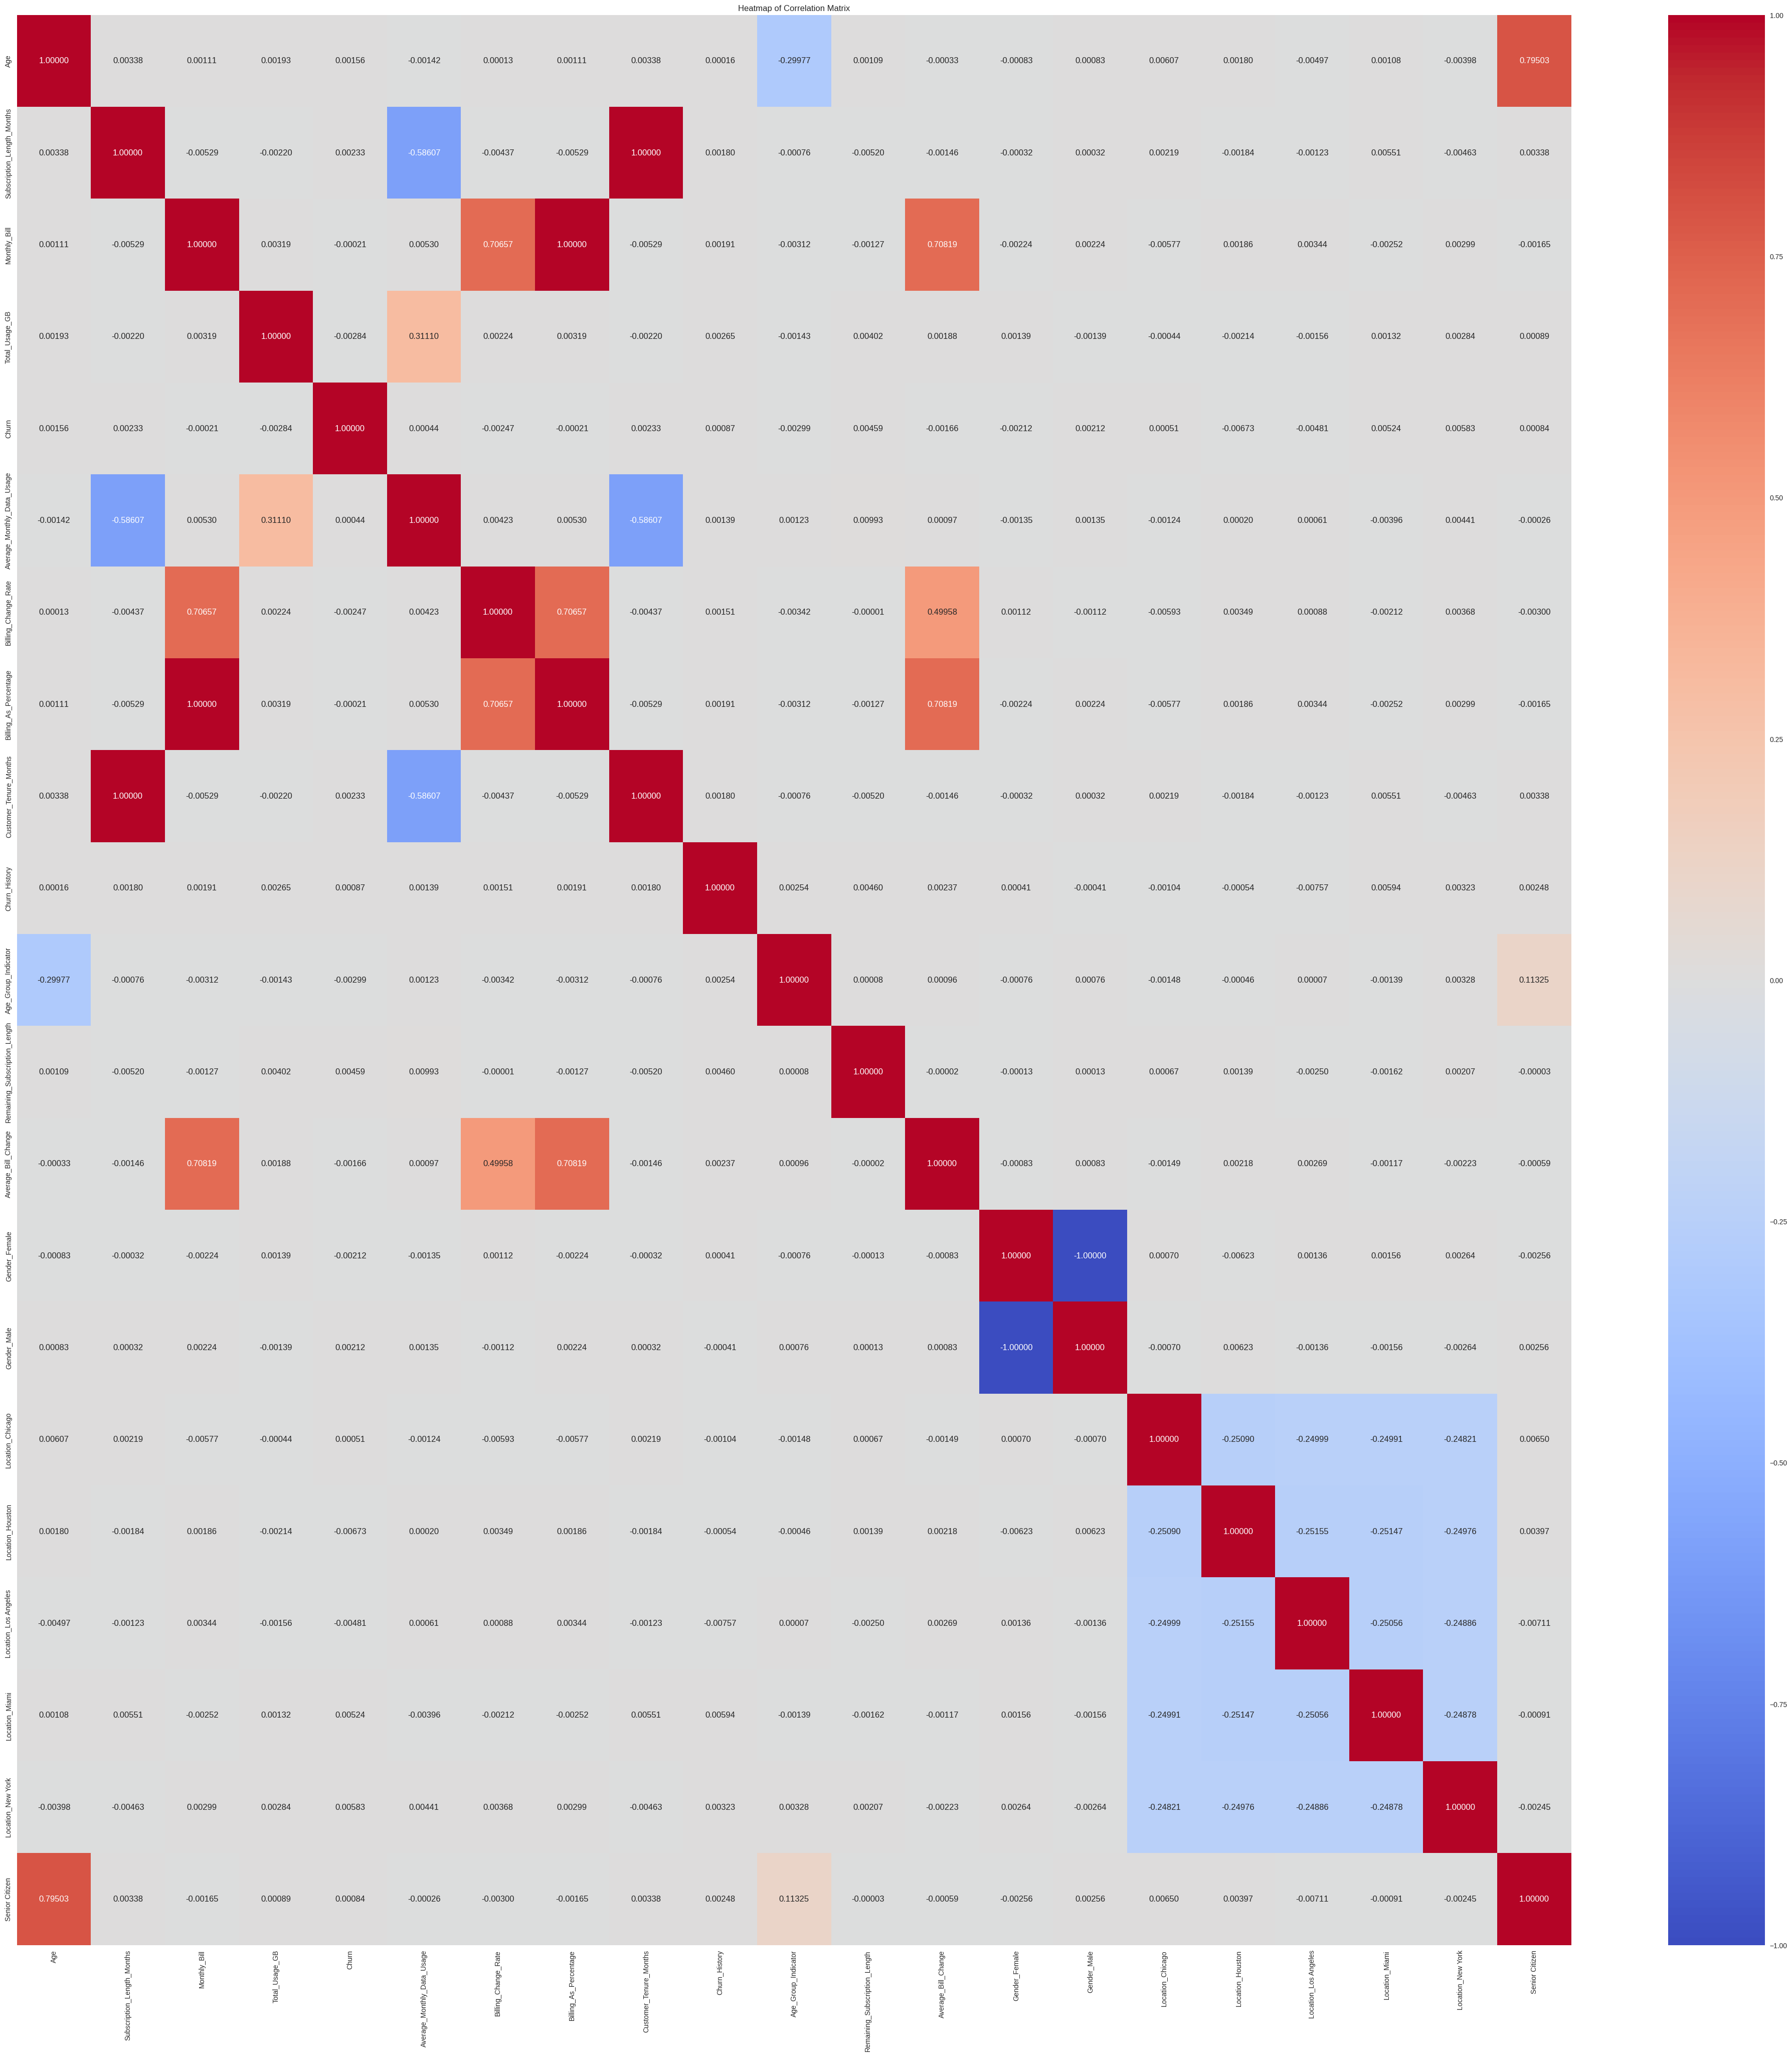

In [ ]:
# with new features:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('customer_data.csv')  # Replace 'customer_data.csv' with your dataset file path

# Assuming your dataset has columns like 'age', 'churn', 'city', and 'gender'

# Define the age threshold for senior citizens
senior_age_threshold = 55

# Create a new column 'Senior Citizen' based on age
df['Senior Citizen'] = df['Age'] >= senior_age_threshold

# Create a heatmap to visualize the relationship between 'Senior Citizen' and other variables
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


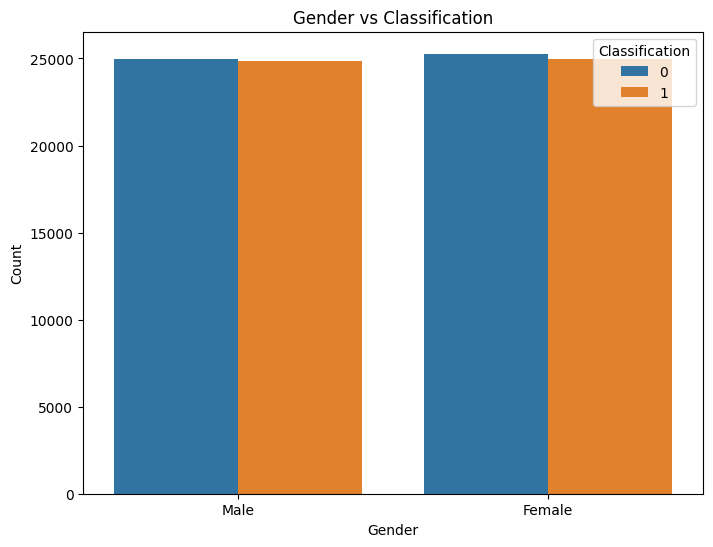

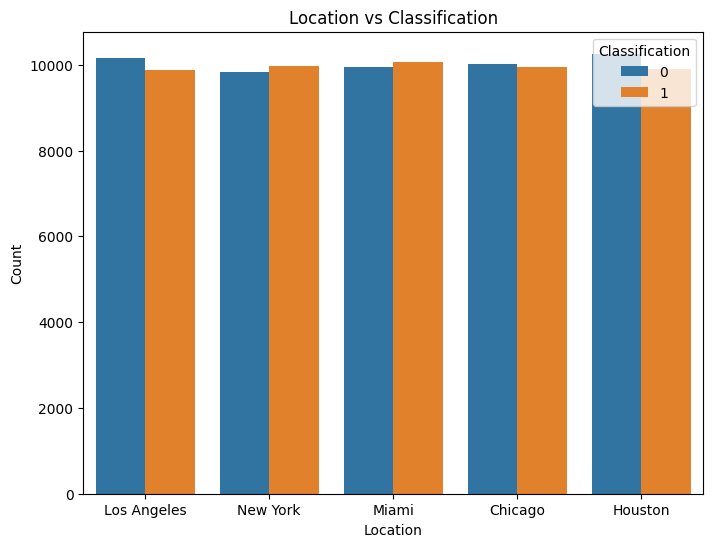

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'categorical_vars' with the list of your categorical variable names
categorical_vars = ['Gender', 'Location']

# Loop through each categorical variable and create bar plots
for cat_var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_var, hue='Churn', data=df)
    plt.title(f'{cat_var} vs Classification')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.legend(title='Classification', loc='upper right')
    plt.show()


# 3 Model Building:
- Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or
neural networks).
- Train and validate the selected model on the training dataset.
- Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall,
F1-score).


In [ ]:
SEED=42

In [ ]:
# Estimators for the VotingClassifier and StackingClassifier.
e1 = XGBClassifier(objective = 'binary:logistic', random_state = SEED,
                   tree_method = "exact", booster = 'gbtree')
e2 = LGBMClassifier(random_state = SEED, verbose = -1)
e3 = CatBoostClassifier(random_state = SEED, verbose = 0)

voting1 = VotingClassifier(estimators = [('lgbm', e2), ('cb', e3)])

In [ ]:
lr = LogisticRegression(random_state = SEED)

rf = RandomForestClassifier(random_state = SEED)

et = ExtraTreesClassifier(bootstrap = True, random_state = SEED)

svc = SVC(random_state = SEED)

knn = KNeighborsClassifier()

hgb = HistGradientBoostingClassifier(random_state = SEED)

xgb = XGBClassifier(objective = 'binary:logistic', tree_method = "exact",
                    random_state = SEED, booster = 'gbtree')

lgbm = LGBMClassifier(random_state = SEED, verbose = -1)

cb = CatBoostClassifier(random_state = SEED, verbose = 0)

voting = VotingClassifier(estimators = [('lgbm', e2), ('cb', e3)])

stacking = StackingClassifier(estimators = [('lgbm', e2), ('cb', e3)],
                              final_estimator = voting1, stack_method='predict')

# We create a dictionary where we store our models with their respective names.
# base_models = {'Logistic_Regression':lr,
              #  'Random_Forest':rf,
              #  'Extra_Trees':et,
              #  'SVC':svc,
              #  'KNN':knn,
              #  'XGB':xgb,
              #  'LGBM':lgbm,
              #  'CatBoost':cb,
              #  'Voting':voting,
              #  'Stacking':stacking,
              #  'HistGrad':hgb}

base_models = {'Logistic_Regression':lr,
               'Random_Forest':rf,
               'Extra_Trees':et,
               'KNN':knn,
               'XGB':xgb,
               'LGBM':lgbm,
               'CatBoost':cb,
               'Voting':voting,
               'Stacking':stacking,
               'HistGrad':hgb}

In [ ]:
# without smote
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

for model_name, model in base_models.items():
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  print(f'* {model_name}: {end-start} seconds')
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
  accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)
  confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
  confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

# We create a dataframe showing the accuracy results in training and testing.
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index').rename(columns = {0:'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index').rename(columns = {0:'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index = True, right_index = True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending = False)
df_accuracy

* Logistic_Regression: 0.24571847915649414 seconds
* Random_Forest: 17.444645881652832 seconds
* Extra_Trees: 5.900312185287476 seconds
* KNN: 0.004964351654052734 seconds
* XGB: 5.007220983505249 seconds
* LGBM: 0.46331143379211426 seconds
* CatBoost: 15.28477144241333 seconds
* Voting: 13.338232040405273 seconds
* Stacking: 79.97222471237183 seconds
* HistGrad: 0.22475051879882812 seconds


,Train,Test
Random_Forest,1.000000,0.49240
Extra_Trees,1.000000,0.49180
KNN,0.686288,0.50055
XGB,0.658275,0.49855
CatBoost,0.635550,0.49765
Voting,0.619537,0.49675
Stacking,0.619537,0.49675
LGBM,0.608750,0.49635
HistGrad,0.529438,0.50355
Logistic_Regression,0.504088,0.50430


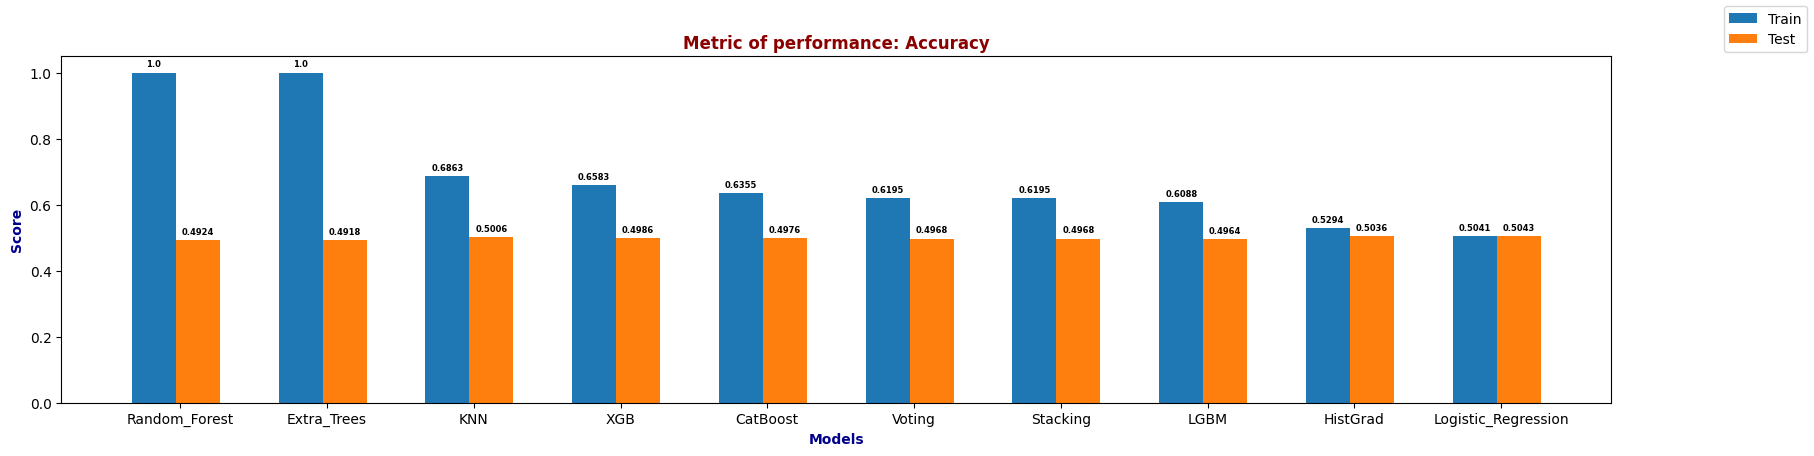

In [ ]:
# Let's visualize the metric in a bar graph.
fig,ax = plt.subplots(figsize = (20, 4.5))
n = len(df_accuracy.index)
x = np.arange(n)
width = 0.3

rects1 = ax.bar(x = x-width, height = df_accuracy.iloc[:,0], width = width)
rects2 = ax.bar(x = x, height = df_accuracy.iloc[:,1], width = width)
ax.set_xticks(x-0.12, df_accuracy.index.to_list())
ax.set_xlabel('Models', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_title('Metric of performance: Accuracy', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = f'{round(height,4)}',
                xy = (rect.get_x()+rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                size = 6,
                weight = 'bold',
                color = 'black')

autolabel(rects1)
autolabel(rects2)
fig.legend(["Train", "Test"])
fig.show()

This time we will also try to find out the feauture importance for all the features as given in the dataset after feature engineering & Normalisation

In [ ]:
X_train

array([[0.69230769, 0.17391304, 0.77857143, ..., 0.        , 0.        ,
        1.        ],
       [0.19230769, 1.        , 0.74371429, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.47826087, 0.31842857, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98076923, 0.04347826, 0.66057143, ..., 0.        , 0.        ,
        0.        ],
       [0.71153846, 0.47826087, 0.84557143, ..., 0.        , 0.        ,
        0.        ],
       [0.15384615, 0.69565217, 0.57728571, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# Performance with 3 age features
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

feature_importance = {}  # Dictionary to store feature importance for each model

for model_name, model in base_models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(f'* {model_name}: {end-start} seconds')

    # Calculate feature importance for the current model
    if hasattr(model, 'feature_importances_'):
        feature_importance[model_name] = model.feature_importances_
    else:
        feature_importance[model_name] = None

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
    accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)

    confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
    confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

# We create a dataframe showing the accuracy results in training and testing.
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)
df_accuracy

# Display feature importance for each model
for model_name, importance_scores in feature_importance.items():
    print(f"Feature Importance for {model_name}:\n{importance_scores}\n")


* Logistic_Regression: 0.24431657791137695 seconds
* Random_Forest: 14.356007099151611 seconds
* Extra_Trees: 5.80819034576416 seconds
* KNN: 0.14777493476867676 seconds
* XGB: 6.133852005004883 seconds
* LGBM: 0.37482261657714844 seconds
* CatBoost: 12.685113668441772 seconds
* Voting: 12.999969005584717 seconds
* Stacking: 80.21916794776917 seconds
* HistGrad: 0.3250269889831543 seconds
Feature Importance for Logistic_Regression:
None

Feature Importance for Random_Forest:
[0.16646724 0.16392413 0.3267288  0.31016322 0.00227566 0.00193949
 0.00284723 0.00350085 0.00354699 0.00393858 0.00358155 0.00402646
 0.00359787 0.00346193]

Feature Importance for Extra_Trees:
[0.20060919 0.19896479 0.29138996 0.28682991 0.00209836 0.00186667
 0.00259327 0.00184835 0.00186831 0.00240161 0.00251508 0.00243365
 0.00235886 0.00222201]

Feature Importance for KNN:
None

Feature Importance for XGB:
[0.09142012 0.08974636 0.09829018 0.09034033 0.         0.
 0.1056229  0.08631585 0.         0.08588835 

In [ ]:
df_accuracy

,Train,Test
Extra_Trees,1.000000,0.49590
Random_Forest,1.000000,0.49355
KNN,0.687137,0.49800
XGB,0.656438,0.50260
CatBoost,0.634200,0.49660
Voting,0.619263,0.49570
Stacking,0.619263,0.49570
LGBM,0.611463,0.49935
HistGrad,0.530438,0.50395
Logistic_Regression,0.504062,0.50425


Features like Senior Citizen, Junior Citizen, Median Citizen, Gender_Male, Location_Chicago, Location_Los Angeles, Location_Miami, and Location_New York have consistently low importance scores across models.
KNN Model:

In [ ]:
#Without normalisation:
# Performance with 3 age features
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

feature_importance = {}  # Dictionary to store feature importance for each model

for model_name, model in base_models.items():
    start = time.time()
    model.fit(X_train2, y_train2)
    end = time.time()
    print(f'* {model_name}: {end-start} seconds')

    # Calculate feature importance for the current model
    if hasattr(model, 'feature_importances_'):
        feature_importance[model_name] = model.feature_importances_
    else:
        feature_importance[model_name] = None

    y_pred_train2 = model.predict(X_train2)
    y_pred_test2 = model.predict(X_test2)

    accuracy_train[model_name] = accuracy_score(np.array(y_train2), y_pred_train2)
    accuracy_test[model_name] = accuracy_score(np.array(y_test2), y_pred_test2)

    confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train2), y_pred_train2)
    confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test2), y_pred_test2)

# We create a dataframe showing the accuracy results in training and testing.
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)
df_accuracy

# Display feature importance for each model
for model_name, importance_scores in feature_importance.items():
    print(f"Feature Importance for {model_name}:\n{importance_scores}\n")


* Logistic_Regression: 0.0907135009765625 seconds
* Random_Forest: 10.954647064208984 seconds
* Extra_Trees: 5.647444009780884 seconds
* KNN: 0.15998244285583496 seconds
* XGB: 4.426905393600464 seconds
* LGBM: 0.3773632049560547 seconds
* CatBoost: 12.584888696670532 seconds
* Voting: 13.656790971755981 seconds
* Stacking: 77.42293548583984 seconds
* HistGrad: 0.17517542839050293 seconds
Feature Importance for Logistic_Regression:
None

Feature Importance for Random_Forest:
[0.16646724 0.16392413 0.3267288  0.31016322 0.00227566 0.00193949
 0.00284723 0.00350085 0.00354699 0.00393858 0.00358155 0.00402646
 0.00359787 0.00346193]

Feature Importance for Extra_Trees:
[0.20070098 0.19890828 0.29132962 0.28690111 0.00209314 0.00187971
 0.00261977 0.00184923 0.00187382 0.00237257 0.00250284 0.00243681
 0.00232927 0.00220285]

Feature Importance for KNN:
None

Feature Importance for XGB:
[0.09142012 0.08974636 0.09829018 0.09034033 0.         0.
 0.1056229  0.08631585 0.         0.08588835 

In [ ]:
df_accuracy

,Train,Test
Extra_Trees,1.000000,0.49565
Random_Forest,1.000000,0.49450
KNN,0.687625,0.49650
XGB,0.656438,0.50255
CatBoost,0.634200,0.49660
Voting,0.616762,0.49890
Stacking,0.616762,0.49890
LGBM,0.607775,0.50085
HistGrad,0.530438,0.50395
Logistic_Regression,0.502575,0.49975


In [ ]:
# Let's visualize the metric in a bar graph.
fig,ax = plt.subplots(figsize = (20, 4.5))
n = len(df_accuracy.index)
x = np.arange(n)
width = 0.3

rects1 = ax.bar(x = x-width, height = df_accuracy.iloc[:,0], width = width)
rects2 = ax.bar(x = x, height = df_accuracy.iloc[:,1], width = width)
ax.set_xticks(x-0.12, df_accuracy.index.to_list())
ax.set_xlabel('Models', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_title('Metric of performance: Accuracy with 3 age features', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = f'{round(height,4)}',
                xy = (rect.get_x()+rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                size = 6,
                weight = 'bold',
                color = 'black')

autolabel(rects1)
autolabel(rects2)
fig.legend(["Train", "Test"])
fig.show()

In [ ]:
#Without normalisation:
# Performance with 3 age features
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

feature_importance = {}  # Dictionary to store feature importance for each model

for model_name, model in base_models.items():
    start = time.time()
    model.fit(X_train2, y_train2)
    end = time.time()
    print(f'* {model_name}: {end-start} seconds')

    # Calculate feature importance for the current model
    if hasattr(model, 'feature_importances_'):
        feature_importance[model_name] = model.feature_importances_
    else:
        feature_importance[model_name] = None

    y_pred_train2 = model.predict(X_train2)
    y_pred_test2 = model.predict(X_test2)

    accuracy_train[model_name] = accuracy_score(np.array(y_train2), y_pred_train2)
    accuracy_test[model_name] = accuracy_score(np.array(y_test2), y_pred_test2)

    confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train2), y_pred_train2)
    confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test2), y_pred_test2)

# We create a dataframe showing the accuracy results in training and testing.
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)
df_accuracy

# Display feature importance for each model
for model_name, importance_scores in feature_importance.items():
    print(f"Feature Importance for {model_name}:\n{importance_scores}\n")


* Logistic_Regression: 0.03347945213317871 seconds
* Random_Forest: 34.56139636039734 seconds
* Extra_Trees: 6.170707702636719 seconds
* KNN: 0.13585519790649414 seconds
* XGB: 7.86917519569397 seconds
* LGBM: 0.5224440097808838 seconds
* CatBoost: 14.47956919670105 seconds
* Voting: 14.985882997512817 seconds
* Stacking: 94.602698802948 seconds
* HistGrad: 0.25035524368286133 seconds
Feature Importance for Logistic_Regression:
None

Feature Importance for Random_Forest:
[0.08572883 0.04907891 0.10429026 0.10701157 0.10959937 0.12000839
 0.10394139 0.0491369  0.01652237 0.01273596 0.12152581 0.12042025]

Feature Importance for Extra_Trees:
[0.0984813  0.06733216 0.10163665 0.10323029 0.1012007  0.10700234
 0.10208763 0.06730873 0.01915719 0.01866966 0.10723561 0.10665776]

Feature Importance for KNN:
None

Feature Importance for XGB:
[0.10259998 0.08856104 0.10673914 0.10528548 0.10892413 0.10314061
 0.         0.         0.08181228 0.08819617 0.10636989 0.10837135]

Feature Importance

In [ ]:
X.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Average_Monthly_Data_Usage', 'Billing_Change_Rate',
       'Billing_As_Percentage', 'Customer_Tenure_Months', 'Churn_History',
       'Age_Group_Indicator', 'Remaining_Subscription_Length',
       'Average_Bill_Change'],
      dtype='object')

In [ ]:
df_accuracy

,Train,Test
Extra_Trees,1.000000,0.50405
Random_Forest,1.000000,0.50075
KNN,0.684450,0.50260
CatBoost,0.678113,0.50460
XGB,0.663963,0.50200
Voting,0.646250,0.50395
LGBM,0.624525,0.50200
HistGrad,0.538150,0.51150
Logistic_Regression,0.501763,0.50400
Stacking,0.480050,0.50200


In [ ]:
#Without normalisation:
# Performance with 3 age features
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

feature_importance = {}  # Dictionary to store feature importance for each model

for model_name, model in base_models.items():
    start = time.time()
    model.fit(X_train3, y_train3)
    end = time.time()
    print(f'* {model_name}: {end-start} seconds')

    # Calculate feature importance for the current model
    if hasattr(model, 'feature_importances_'):
        feature_importance[model_name] = model.feature_importances_
    else:
        feature_importance[model_name] = None

    y_pred_train3 = model.predict(X_train3)
    y_pred_test3 = model.predict(X_test3)

    accuracy_train[model_name] = accuracy_score(np.array(y_train3), y_pred_train3)
    accuracy_test[model_name] = accuracy_score(np.array(y_test3), y_pred_test3)

    confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train3), y_pred_train3)
    confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test3), y_pred_test3)

# We create a dataframe showing the accuracy results in training and testing.
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient='index').rename(columns={0: 'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient='index').rename(columns={0: 'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index=True, right_index=True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending=False)
df_accuracy

# Display feature importance for each model
for model_name, importance_scores in feature_importance.items():
    print(f"Feature Importance for {model_name}:\n{importance_scores}\n")


In [ ]:
df_accuracy

,Train,Test
Random_Forest,1.000000,0.50830
Extra_Trees,1.000000,0.50020
CatBoost,0.685213,0.50165
KNN,0.684500,0.50255
XGB,0.663100,0.49615
Voting,0.655525,0.50445
LGBM,0.634988,0.50530
HistGrad,0.562588,0.50505
Stacking,0.510925,0.50200
Logistic_Regression,0.501763,0.50400


4. Model Optimization:
- Fine-tune the model parameters to improve its predictive performance.
- Explore techniques like cross-validation and hyperparameter tuning.

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define your HistGradientBoostingClassifier with default hyperparameters
hist_grad = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid_hist_grad = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_bins': [100, 255, 512],
    'l2_regularization': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV instance with cross-validation
grid_search_hist_grad = GridSearchCV(hist_grad, param_grid_hist_grad, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_hist_grad.fit(X_train3, y_train3)

# Get the best hyperparameters
best_params_hist_grad = grid_search_hist_grad.best_params_

# Initialize the HistGradientBoostingClassifier with the best hyperparameters
best_hist_grad = HistGradientBoostingClassifier(**best_params_hist_grad, random_state=42)

# Train the final model on the entire training dataset
best_hist_grad.fit(X_train3, y_train3)

# Make predictions on the validation set
y_val_pred_hist_grad = best_hist_grad.predict(X_test3)

# Evaluate the model's performance on the validation set
accuracy_hist_grad = accuracy_score(y_test3, y_val_pred_hist_grad)
print(f"HistGrad Validation Accuracy: {accuracy_hist_grad:.2f}")


HistGrad Validation Accuracy: 0.50


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define your K-Nearest Neighbors (KNN) Classifier with default hyperparameters
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Create a GridSearchCV instance with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_knn.fit(X_train3, y_train3)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Initialize the K-Nearest Neighbors (KNN) model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Train the final KNN model on the entire training dataset
best_knn.fit(X_train3, y_train3)

# Make predictions on the validation set
y_val_pred_knn = best_knn.predict(X_test3)

# Evaluate the KNN model's performance on the validation set
accuracy_knn = accuracy_score(y_test3, y_val_pred_knn)
print(f"KNN Validation Accuracy: {accuracy_knn:.2f}")


KNN Validation Accuracy: 0.50


In [ ]:
# lets try my xgb method here:
# X=X.drop('user-definedlabeln',axis=1)
# y=one_hot_encoded_data['user-definedlabeln']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)


gbm_param_grid = {
    'n_estimators': range(10, 100,10),
    'max_depth': range(3, 5),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}
gbm = XGBClassifier(n_estimators=100)
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                    estimator = gbm, scoring = "accuracy",
                                    verbose = 1, n_iter = 50, cv = 5)
xgb_random.fit(X_normalized, y)
rfc3=xgb_random.predict(X_test)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_,end="\n\n")
print("Best accuracy found: ", xgb_random.best_score_,end="\n\n")

print("accuracy=",accuracy_score(y_test,rfc3),end="\n\n")
print("confusion matrix:\n\n",classification_report(y_test,rfc3,digits=5))


In [ ]:
# import pandas as pd

# Assuming you have a DataFrame 'df' with the original features: Age, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB
# Replace 'your_dataset.csv' with the path to your dataset
# df = pd.read_csv('your_dataset.csv')

# Feature Engineering

# 1. Average Monthly Data Usage
df['Average_Monthly_Data_Usage'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# 2. Billing Change Rate
df['Billing_Change_Rate'] = df['Monthly_Bill'].diff()

# 3. Billing Amount as a Percentage
df['Billing_As_Percentage'] = (df['Monthly_Bill'] / df['Monthly_Bill'].mean()) * 100

# 4. Customer Tenure in Months
df['Customer_Tenure_Months'] = df['Subscription_Length_Months']

# 5. Churn History (Assuming 'Churn' is a binary column indicating churn history)
df['Churn_History'] = df['Churn'].shift(1)  # Lagged version of the churn column

# 6. Age Group Indicator (Assuming age groups are defined)
age_bins = [0, 30, 50, 100]  # Define your age groups as needed
age_labels = ['Young', 'Middle-Aged', 'Senior']
df['Age_Group_Indicator'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 7. Remaining Subscription Length
df['Remaining_Subscription_Length'] = df['Subscription_Length_Months'] - df.index

# 8. Average Bill Change
df['Average_Bill_Change'] = df['Billing_Change_Rate'].rolling(window=3).mean()

# Display the updated DataFrame with engineered features
print(df.head())


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                          17         73.36             236      0   
1                           1         48.76             172      0   
2                           5         85.47             460      0   
3                           3         97.94             297      1   
4                          19         58.14             266      0   

   Average_Monthly_Data_Usage  Billing_Change_Rate  Billing_As_Percentage  \
0                   13.882353                  NaN             112.769247   
1                  172.000000               -24.60              74.954041   
2                

In [ ]:
df.tail(1)

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,Age_Group_Indicator,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
99999,100000,Customer_100000,27,19,76.57,173,1,9.105263,27.32,117.70367,19,1.0,2,-99980,4.973333,1,0,0,0,1,0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have engineered the additional features and added them to your dataset
# Replace 'your_dataset.csv' with the path to your dataset
# data = pd.read_csv('your_dataset.csv')

# Define your features and target variable
features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',  # Original features
            'Average_Monthly_Data_Usage', 'Billing_Change_Rate', 'Billing_As_Percentage',
            'Customer_Tenure_Months', 'Churn_History', 'Age_Group_Indicator',
            'Remaining_Subscription_Length', 'Average_Bill_Change']

X = df[features]  # Features
y = df['Churn']  # Target variable

# Create an imputer instance (for example, using mean imputation)

# Fit and transform the imputer on your feature data
X_imputed = imputer.fit_transform(X)

# Now, you can use X_imputed in your model

# Initialize and train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_imputed, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance (highest to lowest)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


                          Feature  Importance
10  Remaining_Subscription_Length    0.121874
5             Billing_Change_Rate    0.120788
11            Average_Bill_Change    0.120777
4      Average_Monthly_Data_Usage    0.109554
3                  Total_Usage_GB    0.106813
6           Billing_As_Percentage    0.104632
2                    Monthly_Bill    0.104546
0                             Age    0.086257
1      Subscription_Length_Months    0.048144
7          Customer_Tenure_Months    0.047611
8                   Churn_History    0.015857
9             Age_Group_Indicator    0.013146


# 4 Model Optimization:
-  Fine-tune the model parameters to improve its predictive performance.
- Explore techniques like cross-validation and hyperparameter tuning.

Best Performing Model XGBoost
Validation Accuracy : 0.5157

Feature Importances:

Remaining_Subscription_Length (0.1219): This feature has the highest importance score. It suggests that the remaining subscription length is a significant predictor of customer churn. Customers with shorter remaining subscription lengths might be more likely to churn.

Billing_Change_Rate (0.1208): Billing change rate is the second most important feature. It indicates that fluctuations in the monthly billing amount play a crucial role in predicting churn. Higher billing change rates might be associated with a higher likelihood of churn.

Average_Bill_Change (0.1208): This feature is very similar in importance to Billing_Change_Rate. It also captures billing fluctuations but might represent a smoothed or averaged version of those changes.

Average_Monthly_Data_Usage (0.1096): The average monthly data usage is the fourth most important feature. It suggests that customers' data usage patterns can impact their likelihood of churning. Higher data usage may correlate with lower churn rates.

Total_Usage_GB (0.1068): This feature represents the total data usage in gigabytes and is also important. It's related to Average_Monthly_Data_Usage but considers the overall data consumption.

Billing_As_Percentage (0.1046): The percentage of the monthly bill relative to some reference value is the sixth most important feature. This might capture information about customers' budget constraints or sensitivity to price changes.

Monthly_Bill (0.1045): The actual monthly billing amount is an important feature. High monthly bills could be a factor leading to churn.

Age (0.0863): Age is also significant but less so than some of the billing-related features. It indicates that customer age plays a role in predicting churn, with younger or older customers potentially having different behaviors.

Subscription_Length_Months (0.0481): Subscription length in months is less important compared to other features. However, it still contributes to the model's predictions, suggesting that longer subscription commitments might reduce churn.

Customer_Tenure_Months (0.0476): Customer tenure, or how long a customer has been with the provider, is also less important but still relevant. Longer tenure might indicate loyalty and reduce churn.

Churn_History (0.0159): Churn history, which captures whether a customer has churned in the past, has some importance. It's less critical than the other features, indicating that current behavior and characteristics are more predictive.

Age_Group_Indicator (0.0131): Age group indicator has the lowest importance in your model. It suggests that the specific age group category might not be as crucial as the overall age feature.

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define your HistGradientBoostingClassifier with default hyperparameters
hist_grad = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid_hist_grad = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_bins': [100, 255, 512],
    'l2_regularization': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV instance with cross-validation
grid_search_hist_grad = GridSearchCV(hist_grad, param_grid_hist_grad, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_hist_grad.fit(X_train3, y_train3)

# Get the best hyperparameters
best_params_hist_grad = grid_search_hist_grad.best_params_

# Initialize the HistGradientBoostingClassifier with the best hyperparameters
best_hist_grad = HistGradientBoostingClassifier(**best_params_hist_grad, random_state=42)

# Train the final model on the entire training dataset
best_hist_grad.fit(X_train3, y_train3)

# Make predictions on the validation set
y_val_pred_hist_grad = best_hist_grad.predict(X_test3)

# Evaluate the model's performance on the validation set
accuracy_hist_grad = accuracy_score(y_test3, y_val_pred_hist_grad)
print(f"HistGrad Validation Accuracy: {accuracy_hist_grad:.2f}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define your K-Nearest Neighbors (KNN) Classifier with default hyperparameters
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Create a GridSearchCV instance with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search_knn.fit(X_train3, y_train3)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Initialize the K-Nearest Neighbors (KNN) model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Train the final KNN model on the entire training dataset
best_knn.fit(X_train3, y_train3)

# Make predictions on the validation set
y_val_pred_knn = best_knn.predict(X_test3)

# Evaluate the KNN model's performance on the validation set
accuracy_knn = accuracy_score(y_test3, y_val_pred_knn)
print(f"KNN Validation Accuracy: {accuracy_knn:.2f}")


In [ ]:
!pip install pycaret -q


In [ ]:
# pycaret trial
import pycaret.anomaly as anm
import pycaret.classification as cl
import pandas as pd

In [ ]:
dfsample = df.sample(frac=1)
dfsample

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,Age_Group_Indicator,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
64111,55,22,74.13,135,1,6.136364,-16.10,113.952893,22,0.0,1,-64089,5.356667,1,0,0,0,0,0,1
67350,20,18,45.55,316,1,17.555556,-54.10,70.019618,18,0.0,2,-67332,-0.523333,0,1,0,0,0,0,1
77239,36,18,74.98,58,1,3.222222,3.88,115.259516,18,1.0,0,-77221,8.626667,0,1,0,0,0,0,1
39551,51,19,51.63,114,0,6.000000,16.17,79.365815,19,1.0,1,-39532,4.270000,0,1,0,0,1,0,0
44014,66,24,91.28,466,0,19.416667,20.81,140.315933,24,0.0,1,-43990,4.756667,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79659,57,17,42.56,166,1,9.764706,-10.92,65.423380,17,1.0,1,-79642,1.670000,1,0,1,0,0,0,0
33394,69,20,60.33,242,1,12.100000,-22.78,92.739485,20,1.0,1,-33374,5.013333,1,0,1,0,0,0,0
44770,54,24,49.38,94,0,3.916667,1.16,75.907107,24,0.0,1,-44746,5.803333,1,0,0,0,1,0,0
4910,39,21,87.52,142,1,6.761905,45.80,134.536048,21,1.0,0,-4889,12.240000,0,1,0,1,0,0,0


In [ ]:
sizetest = int(0.2*(df.shape[0]))
dfTrain = dfsample[:-sizetest]
dfTest = dfsample[-sizetest:]

an = anm.setup(dfTrain)
model = anm.create_model('histogram')
preds = anm.assign_model(model)
preds = preds.drop('Anomaly',axis=1)
preds

,Description,Value
0,Session id,4474
1,Original data shape,"(80000, 20)"
2,Transformed data shape,"(80000, 20)"
3,Numeric features,20
4,Rows with missing values,0.0%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,Age_Group_Indicator,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Anomaly_Score
64111,55,22,74.129997,135,1,6.136364,-16.100000,113.952896,22,0.0,1,-64089,5.356667,1,0,0,0,0,0,1,11.414200
67350,20,18,45.549999,316,1,17.555555,-54.099998,70.019615,18,0.0,2,-67332,-0.523333,0,1,0,0,0,0,1,8.010435
77239,36,18,74.980003,58,1,3.222222,3.880000,115.259514,18,1.0,0,-77221,8.626667,0,1,0,0,0,0,1,7.468376
39551,51,19,51.630001,114,0,6.000000,16.170000,79.365814,19,1.0,1,-39532,4.270000,0,1,0,0,1,0,0,11.714371
44014,66,24,91.279999,466,0,19.416666,20.809999,140.315933,24,0.0,1,-43990,4.756667,0,1,0,1,0,0,0,11.352058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93562,68,11,47.500000,452,1,41.090908,-11.540000,73.017166,11,1.0,1,-93551,-0.123333,1,0,1,0,0,0,0,11.615839
49046,39,1,42.970001,52,0,52.000000,-50.720001,66.053635,1,0.0,0,-49045,-18.113333,1,0,0,0,0,0,1,7.544109
18891,55,13,39.650002,170,0,13.076923,-43.849998,60.950119,13,1.0,1,-18878,1.946667,1,0,0,1,0,0,0,11.751043
20680,44,7,35.930000,150,1,21.428572,-58.310001,55.231720,7,0.0,0,-20673,-16.766666,1,0,0,0,0,0,1,7.774417


In [ ]:
classif = cl.setup(preds,target='Churn',normalize=True, normalize_method='minmax',fold=9)
top3 = classif.compare_models(n_select=9, fold=9,include=['ada','gbc','et','lr','rf','mlp','xgboost','lightgbm','catboost'],turbo=True)
preds

,Description,Value
0,Session id,792
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(80000, 21)"
4,Transformed data shape,"(80000, 21)"
5,Transformed train set shape,"(56000, 21)"
6,Transformed test set shape,"(24000, 21)"
7,Numeric features,20
8,Rows with missing values,0.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5157,0.5235,0.4977,0.5146,0.5060,0.0312,0.0312,6.6256
catboost,CatBoost Classifier,0.5136,0.5178,0.4888,0.5126,0.5004,0.0270,0.0270,13.1322
lightgbm,Light Gradient Boosting Machine,0.5095,0.5136,0.4609,0.5088,0.4836,0.0187,0.0188,2.4578
rf,Random Forest Classifier,0.5091,0.5115,0.4716,0.5081,0.4892,0.0179,0.0180,14.2433
gbc,Gradient Boosting Classifier,0.5085,0.5086,0.3930,0.5092,0.4435,0.0162,0.0167,15.8389
ada,Ada Boost Classifier,0.5035,0.5059,0.4465,0.5023,0.4727,0.0067,0.0067,3.1767
et,Extra Trees Classifier,0.5024,0.5047,0.4753,0.5009,0.4877,0.0045,0.0046,6.3467
lr,Logistic Regression,0.5007,0.5011,0.4285,0.4989,0.4610,0.0009,0.0009,0.1289
mlp,MLP Classifier,0.4982,0.4987,0.4331,0.4960,0.4617,-0.0041,-0.0041,24.7256


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,...,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Anomaly_Score
64111,55,22,74.129997,135,1,6.136364,-16.100000,113.952896,22,0.0,...,-64089,5.356667,1,0,0,0,0,0,1,11.414200
67350,20,18,45.549999,316,1,17.555555,-54.099998,70.019615,18,0.0,...,-67332,-0.523333,0,1,0,0,0,0,1,8.010435
77239,36,18,74.980003,58,1,3.222222,3.880000,115.259514,18,1.0,...,-77221,8.626667,0,1,0,0,0,0,1,7.468376
39551,51,19,51.630001,114,0,6.000000,16.170000,79.365814,19,1.0,...,-39532,4.270000,0,1,0,0,1,0,0,11.714371
44014,66,24,91.279999,466,0,19.416666,20.809999,140.315933,24,0.0,...,-43990,4.756667,0,1,0,1,0,0,0,11.352058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93562,68,11,47.500000,452,1,41.090908,-11.540000,73.017166,11,1.0,...,-93551,-0.123333,1,0,1,0,0,0,0,11.615839
49046,39,1,42.970001,52,0,52.000000,-50.720001,66.053635,1,0.0,...,-49045,-18.113333,1,0,0,0,0,0,1,7.544109
18891,55,13,39.650002,170,0,13.076923,-43.849998,60.950119,13,1.0,...,-18878,1.946667,1,0,0,1,0,0,0,11.751043
20680,44,7,35.930000,150,1,21.428572,-58.310001,55.231720,7,0.0,...,-20673,-16.766666,1,0,0,0,0,0,1,7.774417


In [ ]:
an = anm.setup(dfTest)
model = anm.create_model('histogram')
dfTestsAnom  = anm.assign_model(model)
dfTestsAnom  = dfTestsAnom.drop('Anomaly',axis=1)
dfTestsAnom
 	# Description

,Description,Value
0,Session id,5064
1,Original data shape,"(20000, 20)"
2,Transformed data shape,"(20000, 20)"
3,Numeric features,20
4,Rows with missing values,0.0%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Data_Usage,Billing_Change_Rate,Billing_As_Percentage,Customer_Tenure_Months,Churn_History,...,Remaining_Subscription_Length,Average_Bill_Change,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Anomaly_Score
15177,19,2,31.990000,123,0,61.500000,-16.510000,49.175140,2,0.0,...,-15175,-4.816667,0,1,0,0,0,0,1,7.914317
75601,21,8,47.070000,484,0,60.500000,-3.480000,72.356171,8,0.0,...,-75593,-15.013333,1,0,0,0,0,0,1,8.042049
60617,65,11,64.629997,65,1,5.909091,30.500000,99.349457,11,0.0,...,-60606,-2.283333,1,0,0,0,1,0,0,11.650193
1425,60,17,67.180000,117,1,6.882353,22.910000,103.269333,17,0.0,...,-1408,8.823334,0,1,1,0,0,0,0,11.467817
41658,44,12,53.570000,381,0,31.750000,20.740000,82.347992,12,1.0,...,-41646,5.063334,0,1,0,0,1,0,0,7.469678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79659,57,17,42.560001,166,1,9.764706,-10.920000,65.423378,17,1.0,...,-79642,1.670000,1,0,1,0,0,0,0,11.284363
33394,69,20,60.330002,242,1,12.100000,-22.780001,92.739487,20,1.0,...,-33374,5.013333,1,0,1,0,0,0,0,11.684547
44770,54,24,49.380001,94,0,3.916667,1.160000,75.907104,24,0.0,...,-44746,5.803333,1,0,0,0,1,0,0,11.334445
4910,39,21,87.519997,142,1,6.761905,45.799999,134.536041,21,1.0,...,-4889,12.240000,0,1,0,1,0,0,0,7.652183


In [ ]:
finalpreds1 = classif.predict_model(top3[0],dfTestsAnom)
finalpreds2 = classif.predict_model(top3[1],dfTestsAnom)
finalpreds3 = classif.predict_model(top3[2],dfTestsAnom)
# finalpreds

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5130,0.5199,0.4893,0.5087,0.4988,0.0255,0.0255


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5167,0.5217,0.4948,0.5125,0.5035,0.0330,0.0330


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5170,0.5247,0.4514,0.5141,0.4807,0.0327,0.0330


saving our xgboost model

In [ ]:
top3[0].save_model('/content/drive/MyDrive/internwork/xgb.bin')

In [ ]:
from pycaret.classification import save_model

save_model(top3[0], '/content/drive/MyDrive/internwork/xgb_caret.bin')
save_model(top3[1], '/content/drive/MyDrive/internwork/catboost_caret.bin')
save_model(top3[1], '/content/drive/MyDrive/internwork/lgbm_caret.bin')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age',
                                              'Subscription_Length_Months',
                                              'Monthly_Bill', 'Total_Usage_GB',
                                              'Average_Monthly_Data_Usage',
                                              'Billing_Change_Rate',
                                              'Billing_As_Percentage',
                                              'Customer_Tenure_Months',
                                              'Churn_History',
                                              'Age_Group_Indicator',
                                              'Remaining_Subscription_Length',
                                              'Avera...
                                                               verbose='deprecated'))),
                 (

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc = accuracy_score(list(finalpreds['Churn'].values),list(finalpreds['prediction_label'].astype('int').values))
cfm = confusion_matrix(list(finalpreds['Churn'].values),list(finalpreds['prediction_label'].astype('int').values))
print("Conf. Matrix\n",cfm,"\n")
print("Accuracy: ",acc*100,"%")

In [ ]:
continuous=['Age', 'Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB']
categorical=[ 'Gender', 'Location']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame for each class of sleepiness
df_churn_0 = df[df['Churn'] == 0]
df_churn_1 = df[df['Churn'] == 1]


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed based on the number of columns
num_cols = len(continuous)
num_plots_per_row = 2
# num_rows = int(np.ceil(num_cols / num_plots_per_row))
num_rows = 2

# Adjust the figure size based on the number of rows and plots per row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 10 * num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(continuous):
    row_idx = i // num_plots_per_row
    col_idx = i % num_plots_per_row

    # Create a single axis for each variable
    ax = axes[row_idx, col_idx]

    # Create boxplots for train and test data side by side
    sns.boxplot(data=[df_churn_0[column], df_churn_1[column]], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(['Churn 0', 'Churn 1'])

plt.tight_layout()
plt.show()

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train_cont = X_train[continuous]  # Replace 'continous' with the actual list of continuous columns

X_test = pd.DataFrame(X_test, columns=X.columns)
X_test_cont = X_test[continuous]  # Replace 'continous' with the actual list of continuous columns


# 5 Deployment - Done with Flask and Azure

- Once satisfied with the model's performance, deploy it into a production-like environment (you can simulate this in a development environment).
- Ensure the model can take new customer data as input and provide churn predictions.

Deployed API Link:

https://sunbase.azurewebsites.net/predict

POST API

Body:
```
# Sample

{
    "age": 30,
    "subscription_length_months": 40,
    "monthly_bill": 76.57,
    "total_usage_gb": 173,
    "gender":"Female",
    "location":"Houston"
}
```



Python Flask Script:


```
# This is formatted as code
```

Requirements.txt file:


```
# This is formatted as code
```

Instructions to run locally

1. Create a folder with some name
2. Create 2 files app.py and requirements.txt
3. Run
```
pip install -r requirements.txt
python app.py
```
4. Now open a software to make a post request and use the above code as a sample